In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats  
import seaborn as sns

import math
import scipy.stats as st
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_colwidth = 150

# «Метанпромбанк». Сегментация пользователей по потреблению и анализ оттока клиентов

«Метанпромбанк» — деньги не пахнут! Лучший банк страны столкнулся с проблемой - клиенты уходят! Нашей главной задачей станет сегментация пользователей по потреблению. Анализ покажет, как клиенты пользуются нашими услугами, а так же поможет нам составить портрет клиентов, которые склонны уходить из банка.

**Цель исследования**:
- помочь отделу маркетинга сформировать стратегию работы с действующими клиентами и  сократить их отток

**Задачи исследования**:
- провести анализ датасета существующих и ушедших клиентов с целью выявления особенно уязвимых групп по количеству оттока
- сегментировать клиентов, выявить отличительные черты сегментов и дать рекомендации по работе с ними

- данные распределены равномерно, выбросы есть, их много.
- медианный баланс - 5,2 млн руб., минмальный 0 руб., максимальный 110 млн. руб.
- колонка с балансом содержит только положительные значения
- отбросим значения баланса более 10млн руб. как выбросы, искажающие исследование
- проведем замену пропусков на нули

<a id="0"></a> <br>
**Ход исследрования**

1. [**ШАГ 1. Загрузка данных и подготовка к исследованию.**](#1)
    - [Загрузка данных](#2)
    - [Приведение к "змеиному" регистру названия колонок](#4)
    - [Обработка дубликатов](#5)
    - [Коррекция типов данных](#6)
    - [Обработка пропусков и аномалий](#3)

        
        
2. [**ШАГ 2. Исследовательский анализ данных.**](#8)
     - [Описание типичных клиентов по столбцам](#9)
     - [Визуализация распределения отточных и оставшихся клиентов по столбцам](#10)
     - [Матрица корреляции](#11)


     
3. [**ШАГ 3. Проверка статистичеких гипотез.**](#12)
    - [ГИПОТЕЗА 1. Различие в возрасте между клиентами, пользующиеся 1 продуктом банка, и пользовтаелями, использующими 2 продуктами](#13)
    - [ГИПОТЕЗА 2. Различие в доходах мужчин и женщин](#14)
    

4. [**ШАГ 4. Промежуточный итог об оттоке пользователей.**](#15)
    

5. [**ШАГ 5. Сегментация по количеству потребляемых продуктов**](#16)
    - [СЕГМЕНТ 1. Клиенты с текущим балансом более 2 млн.руб](#17)
    - [СЕГМЕНТ 2. Мужины с 2 продуктами банка](#18)
    - [СЕГМЕНТ 3. Женщины с 2 продуктами банка](#19)
    - [СЕГМЕНТ 4. Мужины с 1 продуктом банка](#20)
    - [СЕГМЕНТ 5. Женщины с 1 продуктом банка](#21)
    - [СЕГМЕНТ 6. Клиенты с 3-5 продуктами банка](#22)


6. [**Выводы и рекомендации.**](#23)


7. [**Презентация.**](#24)

**Описание данных**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Файл `moscow_places.csv`:

`USERID` — идентификатор пользователя,

`score` — баллы кредитного скоринга, 

`city` — город,

`gender` — пол, 

`age` — возраст,

`equity` — количество баллов собственности,

`balance` — баланс на счёте,

`products` — количество продуктов, которыми пользуется клиент,

`credit_card` — есть ли кредитная карта,

`last_activity` — активный клиент,

`EST_SALARY` — оценочный доход клиента,

`churn` — признак оттока.

<a id='1'></a>
## Шаг 1. Загрузка данных и подготовка к исследованию

<a id='2'></a>
### Загрузка данных

In [2]:
# загрузим и сохраним
df = pd.read_csv('/datasets/bank_scrooge.csv')

In [3]:
# посмотрим на наш датасет
display(df)
print(df.info())
print(df.isna().sum())
print(df.duplicated().value_counts())

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
None
USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_acti

- датасет содержит 10000 строк о пользователях банка
- присутсвуют пропуски в столбцах с возрастом и текущим балансом
- название колонок требуется привести к "змеиному" регистру
- часть колонок требуют изменения типа
- явные дубликаты отсутсвуют

<a id='4'></a>
### Приведение к "змеиному" регистру названия колонок

In [4]:
# приведем все колонки к нижнему регистру
df.columns = df.columns.str.lower()

In [5]:
# проверим результат
list(df)

['userid',
 'score',
 'city',
 'gender',
 'age',
 'equity',
 'balance',
 'products',
 'credit_card',
 'last_activity',
 'est_salary',
 'churn']

<a id='5'></a>
### Обработка дубликатов

Ранее было выяснено, что датасет не содержит явные дубликаты. Посмотрим, есть ли неявные. В датафрейме есть только одно поле, подразумевающее под собой уникальное значение для каждой строки - поле `userid` (уникальный клиентский номер)

In [6]:
# посмотим поличество будликатов по полю `userid`
df['userid'].duplicated().sum()

73

Поскольку датасет содержит всего лишь 50 дубликатов по исследуемому полю - смело удалим их, как несущественно количество (0,5% от всего датасета)

In [7]:
# удаляем дубликаты по колонке `userid`
df = df.drop_duplicates(['userid'])

In [8]:
# проверяем результат
df['userid'].duplicated().sum()

0

<a id='6'></a>
### Коррекция типов данных

In [9]:
# взгянем еще раз на датасет и типы данных
display(df)
print(df.info())

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9927 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9927 non-null   int64  
 1   score          9927 non-null   float64
 2   city           9927 non-null   object 
 3   gender         9927 non-null   object 
 4   age            9923 non-null   float64
 5   equity         9927 non-null   int64  
 6   balance        7667 non-null   float64
 7   products       9927 non-null   int64  
 8   credit_card    9927 non-null   int64  
 9   last_activity  9927 non-null   int64  
 10  est_salary     9927 non-null   float64
 11  churn          9927 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1008.2+ KB
None


- приведем столбцы `score`, `age`, `balance` и `est_salary` к целочисленным значенияx
- создади бинарные столбцы для столбцов `city` и `gender` для дальнейшего анализа

In [10]:
# приведем столбцы `score` и `est_salary` к целочисленным значения
df[['score', 'est_salary']] = df[['score', 'est_salary']].astype('int')

In [11]:
# дублируем столбцы city и gender для дальнейшего перекодирования
df['city_1'] = df['city']
df['gender_1'] = df['gender']

# методом .get_dummies создадим новые бинарные столбцы
df = pd.get_dummies(df, columns = ['gender_1', 'city_1'])

# поменяем их назваия
df.rename(columns = {'city_1_Ростов':'rostov',\
                     'city_1_Рыбинск':'rybinsk',\
                     'city_1_Ярославль':'yaroslavl',\
                     'gender_1_Ж':'female',\
                     'gender_1_М':'male'}, inplace = True)

In [12]:
# проверяем результат
display(df)
print(df.info())

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,female,male,rostov,rybinsk,yaroslavl
0,183012,850,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719,1,1,0,0,1,0
1,146556,861,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621,0,1,0,0,1,0
2,120722,892,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683,0,1,0,0,1,0
3,225363,866,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423,1,1,0,0,0,1
4,157978,730,Ярославль,М,34.0,5,174.00,1,1,0,67353,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814,Рыбинск,М,27.0,1,78144.65,1,0,1,18943,0,0,1,0,1,0
9996,139170,894,Ярославль,М,46.0,0,NaN,1,1,0,196898,0,0,1,0,0,1
9997,115639,903,Ярославль,М,24.0,0,NaN,2,1,1,108905,0,0,1,0,0,1
9998,148700,777,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874,0,1,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9927 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9927 non-null   int64  
 1   score          9927 non-null   int64  
 2   city           9927 non-null   object 
 3   gender         9927 non-null   object 
 4   age            9923 non-null   float64
 5   equity         9927 non-null   int64  
 6   balance        7667 non-null   float64
 7   products       9927 non-null   int64  
 8   credit_card    9927 non-null   int64  
 9   last_activity  9927 non-null   int64  
 10  est_salary     9927 non-null   int64  
 11  churn          9927 non-null   int64  
 12  female         9927 non-null   uint8  
 13  male           9927 non-null   uint8  
 14  rostov         9927 non-null   uint8  
 15  rybinsk        9927 non-null   uint8  
 16  yaroslavl      9927 non-null   uint8  
dtypes: float64(2), int64(8), object(2), uint8(5)
memory 

<a id='3'></a>
### Обработка пропусков и аномалий

In [13]:
# дублируем датасет для удаления аномалий и сохранения всего датсета
df_norm = df
df_full = df
df_original = df

#### Столбец `score`

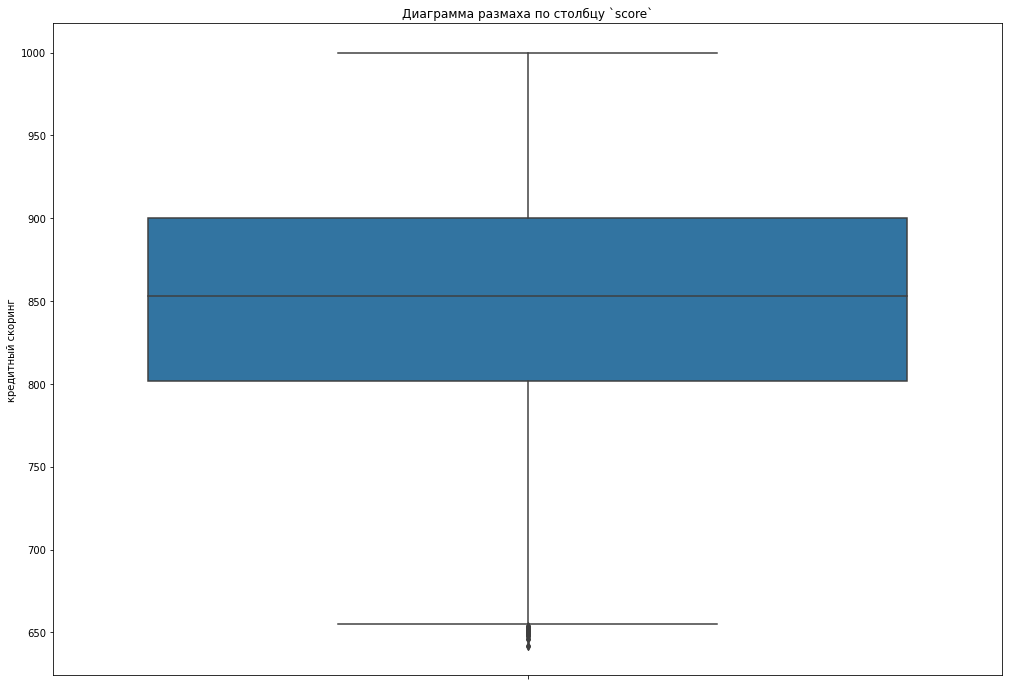

In [14]:
# посмотрим столбец на выбросы в ящике с усами
plt.figure(figsize=(17, 12))
sns.boxplot(y = 'score', data = df)
plt.xlabel('')
plt.ylabel('кредитный скоринг')
plt.title('Диаграмма размаха по столбцу `score`');

In [15]:
# посмотрим на выбросы по столбцу
boxplot_stats(df.score).pop(0)['fliers']

array([652, 649, 649, 646, 651, 653, 650, 642, 652, 649, 653, 652, 648,
       651, 648, 646, 654, 652, 652, 653, 649, 649, 653, 652, 642, 650,
       652, 653, 653, 653, 653, 649, 649])

- явных выбросов нет, влияющих на последующий анализ, нет, данные распределены равномерно

In [16]:
# посмотрим как выглядят аномалии
df.query('score < 653').describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,female,male,rostov,rybinsk,yaroslavl
count,24.000000,24.000000,24.000000,24.000000,0.0,24.000000,24.0,24.000000,24.000000,24.0,24.000000,24.000000,24.000000,24.000000,24.000000
mean,171930.625000,649.208333,45.791667,0.041667,NaN,1.083333,1.0,0.708333,100975.791667,0.0,0.375000,0.625000,0.041667,0.291667,0.666667
std,29614.330636,2.873858,14.027858,0.204124,NaN,0.282330,0.0,0.464306,56261.332645,0.0,0.494535,0.494535,0.204124,0.464306,0.481543
min,117059.000000,642.000000,25.000000,0.000000,NaN,1.000000,1.0,0.000000,26429.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154552.500000,648.750000,34.750000,0.000000,NaN,1.000000,1.0,0.000000,54004.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,173998.500000,649.000000,39.000000,0.000000,NaN,1.000000,1.0,1.000000,100129.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000
75%,197495.000000,652.000000,58.250000,0.000000,NaN,1.000000,1.0,1.000000,148552.250000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000
max,213745.000000,652.000000,69.000000,1.000000,NaN,2.000000,1.0,1.000000,206397.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


- всего 24 клиента
- пол - мужчины (62%) и женщины (38%)
- средний возраст - 39
- 1 продукт банка
- оценка собственности - 0
- баланс неизвестен
- кредитная карта - есть у всех
- без оттока
- активность - 70%
- в бОльшей степени из Ярославля (66%) и Рыбинска (29%)

In [17]:
# отбросим аномалии по скорингу для выяснпения нормального клиента
df = df.query('score > 653')

#### Столбец `city`

In [18]:
# посмотрим расперделение клиентов по столбцу `city`
df['city'].value_counts()

Ярославль    5835
Рыбинск      2644
Ростов       1416
Name: city, dtype: int64

- в нашем датасете всего 3 города следущим распеределнием: Ярославль (58%), Рыбинск (26%) и Ростов (14%)
- выбросов или аномалий не найдено

#### Столбец `gender`

In [19]:
# посмотрим расперделение клиентов по столбцу `gender`
df['gender'].value_counts()

М    4951
Ж    4944
Name: gender, dtype: int64

- в нашем датасете всего 2 гендера (ура!): мужчины (50%) и женщины (50%)
- выбросов или аномалий не найдено

#### Столбец `age`

Ранее было выявлено 26 пропусков в с олбце. Пропуски ам заменить нечем. Поскольку возраст нам понадобиться для дальнейшего анализа и таких строчек всего 26 - мы удалим их. Потеря для датасета несущественна - порядка 0,2% (26 из 10 000).

In [20]:
# удаляем строки с пропусками в столбце 'age'
df = df.dropna(subset = ['age'])

Теперь посмотрим на выбросы и аномалии

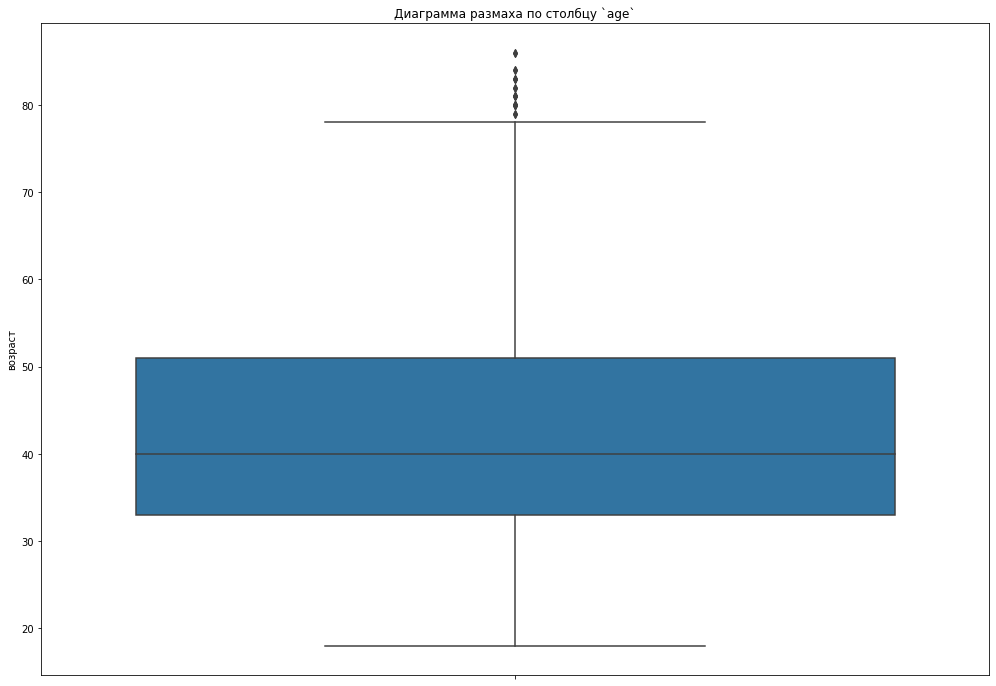

In [21]:
# посмотрим столбец на выбросы в ящике с усами
plt.figure(figsize=(17, 12))
sns.boxplot(y = 'age', data = df)
plt.xlabel('')
plt.ylabel('возраст')
plt.title('Диаграмма размаха по столбцу `age`');

In [22]:
boxplot_stats(df.age).pop(0)['fliers']

array([80., 80., 80., 80., 83., 82., 81., 83., 84., 81., 80., 81., 81.,
       79., 82., 79., 86., 80., 86., 84., 83., 80.])

- возраст клиентов в рамках диаграммы размаха - 18-78 лет
- выбросы: 79 - 86 лет

In [23]:
# посмотрим на аномальных клиентов
df.query('age >= 79').describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,female,male,rostov,rybinsk,yaroslavl
count,22.000000,22.000000,22.000000,22.000000,1.500000e+01,22.000000,22.000000,22.000000,22.000000,22.000000,22.0,22.0,22.000000,22.000000,22.000000
mean,166450.590909,837.363636,81.590909,1.954545,6.622053e+05,1.590909,0.545455,0.681818,92410.272727,0.045455,1.0,0.0,0.136364,0.363636,0.500000
std,35231.010827,80.309844,2.062340,1.430194,4.044001e+05,0.796366,0.509647,0.476731,109940.384344,0.213201,0.0,0.0,0.351250,0.492366,0.511766
min,115610.000000,658.000000,79.000000,0.000000,1.395766e+05,0.000000,0.000000,0.000000,18037.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000
25%,142165.500000,787.750000,80.000000,0.250000,3.424915e+05,1.000000,0.000000,0.000000,35255.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000
50%,160331.000000,852.500000,81.000000,2.500000,5.463133e+05,1.500000,1.000000,1.000000,62632.000000,0.000000,1.0,0.0,0.000000,0.000000,0.500000
75%,203357.250000,891.000000,83.000000,3.000000,9.703970e+05,2.000000,1.000000,1.000000,104780.500000,0.000000,1.0,0.0,0.000000,1.000000,1.000000
max,219171.000000,962.000000,86.000000,4.000000,1.331131e+06,3.000000,1.000000,1.000000,548776.000000,1.000000,1.0,0.0,1.000000,1.000000,1.000000


- всего 22 клиента
- пол - женщины (100%)
- средний возраст - 81
- 2 продукта банка
- оценка собственности - 3
- баланс 546 т.р.
- кредитная карта - есть у 54%
- отток - 4%
- активность - 68%
- з/п - 62т.р.
- в бОльшей степени (относительно долей датасета) -  из Рыбинска (36%)

In [24]:
df = df.query('age < 79')

In [25]:
# поменяем на целочислленный формат
df['age'] = df['age'].astype('int')

#### Столбец `equity`

In [26]:
# посмотрим расперделение клиентов по столбцу `equity`
df['equity'].value_counts()

0    2517
5    1909
4    1839
3    1523
2    1043
1     768
6     161
7      79
8      17
9      13
Name: equity, dtype: int64

- Оценка активов клиентов выглядит гармонично и без выбросы (оценка от 0 до 9)
- оставим все как есть

#### Столбец `balance`

In [27]:
# посмотрим еще раз на столбец
print(df[['balance']].isna().value_counts())
df[['balance']].describe()

balance
False      7648
True       2221
dtype: int64


,balance
count,7.648000e+03
mean,8.285738e+05
std,1.986104e+06
min,0.000000e+00
25%,2.953012e+05
50%,5.249277e+05
75%,9.807537e+05
max,1.191136e+08


- Начнем с пропусков. Их в в солбце `balance` (текущий баланс счета клиента) аж 2295. Просто удалить строки не получится - т.к. 2295 записей - это 22,9% процента от датасета. 
- существуют разные возможные причины возникновения пропусков: могла произо ошибка при выгрузке данных, баланс клиентов может быть нулевой.
- прежде чем принимать решение о том, что делать с пропусками, посмотрим на распределение значений

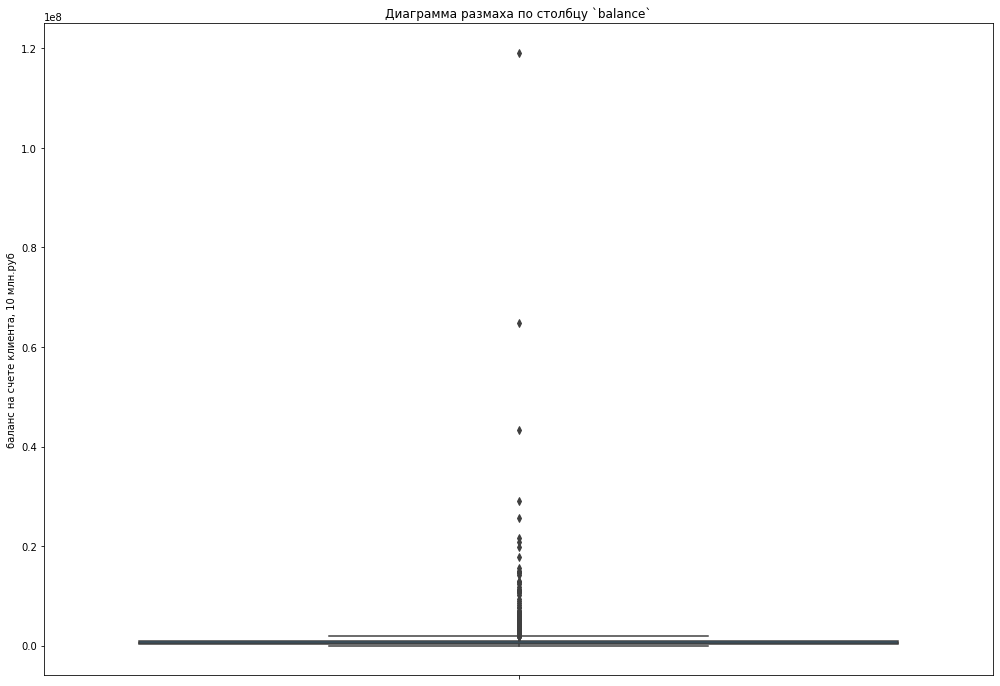

In [28]:
# посмотрим на выброчы по столбцу 'balance'
plt.figure(figsize=(17, 12))
sns.boxplot(y = 'balance', data = df) 
plt.xlabel('')
plt.ylabel('баланс на счете клиента, 10 млн.руб')
plt.title('Диаграмма размаха по столбцу `balance`');

Выглядит не очень, в наличии явные выбросы, построим ящик с усами поближе

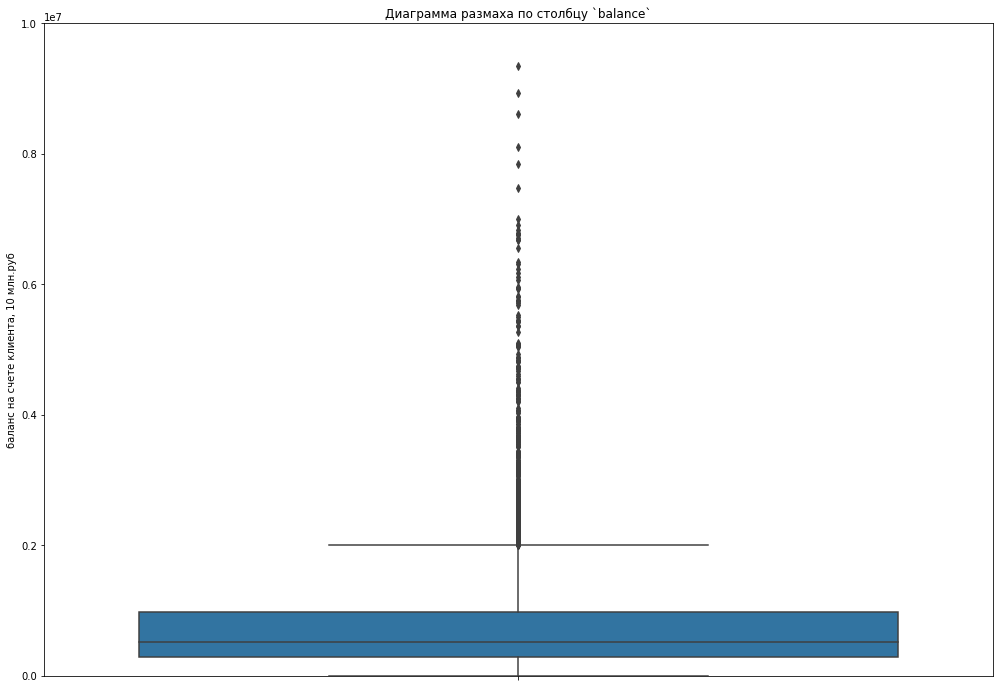

In [29]:
plt.figure(figsize=(17, 12))
sns.boxplot(y = 'balance', data = df) 
plt.ylim(0, 10000000)
plt.xlabel('')
plt.ylabel('баланс на счете клиента, 10 млн.руб')
plt.title('Диаграмма размаха по столбцу `balance`');

- мы видим очень много выбросов по верхней границе диаграммы размаха.
- посмотрим, чем отличаются богатые клиенты (с балансом больше 2млн. руб.) от обычных (попадающих в ящик с усами, с балансом менее 2 млн.руб.)

In [30]:
# посмотрим на обычных клиентов (попвавших в ясатые ящик) и сохраним их в новой переменной для дальнейшего анализа
df.query('balance <= 2000000').describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,female,male,rostov,rybinsk,yaroslavl
count,7221.000000,7221.000000,7221.000000,7221.000000,7.221000e+03,7221.000000,7221.000000,7221.000000,7.221000e+03,7221.000000,7221.000000,7221.000000,7221.000000,7221.000000,7221.000000
mean,171458.246503,839.062180,42.698795,3.342335,6.137326e+05,2.058995,0.651156,0.514749,1.129139e+05,0.221022,0.524443,0.475557,0.158288,0.275585,0.566127
std,33662.974211,52.618366,12.176495,1.596037,4.311354e+05,0.744218,0.476637,0.499817,7.064001e+04,0.414964,0.499437,0.499437,0.365036,0.446840,0.495642
min,94561.000000,689.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142443.000000,799.000000,33.000000,2.000000,2.862064e+05,2.000000,0.000000,0.000000,6.523500e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,172462.000000,836.000000,40.000000,4.000000,4.889301e+05,2.000000,1.000000,1.000000,1.027710e+05,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,200822.000000,875.000000,51.000000,5.000000,8.721878e+05,2.000000,1.000000,1.000000,1.469960e+05,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,229136.000000,999.000000,78.000000,9.000000,1.999799e+06,5.000000,1.000000,1.000000,1.130928e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
# посмотрим на богатых клиентов (с балансом более 2 млн.руб)
df.query('balance > 2000000').describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,female,male,rostov,rybinsk,yaroslavl
count,427.000000,427.000000,427.000000,427.000000,4.270000e+02,427.000000,427.000000,427.000000,4.270000e+02,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000
mean,175001.386417,924.749415,45.070258,4.327869,4.461755e+06,2.456674,0.456674,0.526932,3.249968e+05,0.491803,0.360656,0.639344,0.081967,0.194379,0.723653
std,36104.906323,33.862057,11.049812,1.009460,7.324261e+06,0.882735,0.498704,0.499860,2.651586e+05,0.500519,0.480754,0.480754,0.274637,0.396186,0.447715
min,96562.000000,784.000000,23.000000,1.000000,2.009137e+06,1.000000,0.000000,0.000000,2.176500e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,147536.000000,903.000000,36.000000,4.000000,2.355243e+06,2.000000,0.000000,0.000000,1.689660e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,176292.000000,927.000000,42.000000,5.000000,2.917344e+06,2.000000,0.000000,1.000000,2.312100e+05,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,208416.000000,948.000000,54.000000,5.000000,4.090911e+06,3.000000,1.000000,1.000000,3.461520e+05,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,229058.000000,1000.000000,78.000000,8.000000,1.191136e+08,4.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Найдены существенные отличия в медианах:
1. Кредитный скоринг: обычные - 836, богатые - 927
2. Возраст: обычные клиенты - обычные - 40, богатые - 42
3. Оценка собственности: обычные - 4, богатые - 5
4. Баланс: обычные - 489 т.р., богатые - 2,9 млн.руб.
5. Пользователей кредиткой: обычные - 65%, богатые - 45%
6. З/П: обычные - 102 т.р., богатые - 231 т.р.
7. Уровень оттока: обычные - 22%, богатые - 49%

Таким образом, сразу видим проблему с богатыми клиентами: высокий уровень оттока - около половины богатых клиентов уходят из банка. Следовательно, не смотря на то, что богатые клиенты - входят в выбросы по текущему балансу, просто так выбросить из анализа мы не можем, т.к. группа в высокой зоне риска оттока. 

**Удалим их из копии датасета для определения нормальных клиентов, но оставим для анлиза и сегментации.**

In [32]:
df = df.query('balance <= 2000000 or balance != balance')

Теперь нужно принять решение о том, что делать с пропусками. Посмотрим, чем отличаются клиенты с балансом от клиентов без него

In [33]:
# посмотрим дискрайб по клиентам без баланса ("без Б")
df[df['balance'].notnull()].describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,female,male,rostov,rybinsk,yaroslavl
count,7221.000000,7221.000000,7221.000000,7221.000000,7.221000e+03,7221.000000,7221.000000,7221.000000,7.221000e+03,7221.000000,7221.000000,7221.000000,7221.000000,7221.000000,7221.000000
mean,171458.246503,839.062180,42.698795,3.342335,6.137326e+05,2.058995,0.651156,0.514749,1.129139e+05,0.221022,0.524443,0.475557,0.158288,0.275585,0.566127
std,33662.974211,52.618366,12.176495,1.596037,4.311354e+05,0.744218,0.476637,0.499817,7.064001e+04,0.414964,0.499437,0.499437,0.365036,0.446840,0.495642
min,94561.000000,689.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142443.000000,799.000000,33.000000,2.000000,2.862064e+05,2.000000,0.000000,0.000000,6.523500e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,172462.000000,836.000000,40.000000,4.000000,4.889301e+05,2.000000,1.000000,1.000000,1.027710e+05,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,200822.000000,875.000000,51.000000,5.000000,8.721878e+05,2.000000,1.000000,1.000000,1.469960e+05,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,229136.000000,999.000000,78.000000,9.000000,1.999799e+06,5.000000,1.000000,1.000000,1.130928e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
# посмотрим дискрайб по клиентам без баланса ("с Б")
df[df['balance'].isnull()].describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,female,male,rostov,rybinsk,yaroslavl
count,2221.000000,2221.000000,2221.000000,2221.000000,0.0,2221.000000,2221.000000,2221.000000,2.221000e+03,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000
mean,172046.576317,868.531292,41.961279,0.050878,NaN,1.162990,0.813597,0.546601,2.286877e+05,0.005403,0.440792,0.559208,0.105358,0.253039,0.641603
std,33343.381959,86.331540,11.750305,0.219798,NaN,0.402133,0.389519,0.497936,2.008267e+05,0.073323,0.496594,0.496594,0.307083,0.434851,0.479638
min,114182.000000,654.000000,18.000000,0.000000,NaN,1.000000,0.000000,0.000000,2.027400e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142981.000000,877.000000,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.219960e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,172635.000000,903.000000,40.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.755500e+05,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,201557.000000,922.000000,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,2.414480e+05,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,229145.000000,990.000000,78.000000,1.000000,NaN,3.000000,1.000000,1.000000,1.333687e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- 2221 клиента
- пол - мужской (56%)и женский (44%)
- средний кредитный скоринг - 903
- средняя оценка собственности - 0
- баланс - неизвестен
- 1 продукт банка
- есть кредитная карта у 81%
- активность - 54%
- з/п 175 т.р.
- отток - 0,5%

Замена пропусков на нули или отрицательные значения сильно исказит статистические показатели и визуализации. Заглушки - не будут ничем лучше простых пропусков.

**Оставим пропуски как есть.**

**Наиболее вероятные причины возникновения пропусков:**

- ошибки при выгрузке данных: в строках с пропусками в балансе так же практически везде отсутсвует оценка сосбтвенности клиента, а скоринговый рейтинг значителньно выше среднего, что является нелогичным. 

- данные о балансе этих пользователей скрыты от нас: высокий скоринговый рейтинг говорит говорит о ВИПовости клиента, а баланс и оценка собственности - недоступны. Более того, з/п - выше среднего. 

#### Столбец `products`

In [35]:
# посмотрим расперделение клиентов по столбцу `products`
df['products'].value_counts()

2    4846
1    3232
3     948
4     397
5      19
Name: products, dtype: int64

 - сразу видим аномалию - 1 клиент с 0 продуктов банка, что является невозможным
 - удалим этого клиента

In [36]:
df = df.query('products >= 1')
df_norm = df_norm.query('products >= 1')

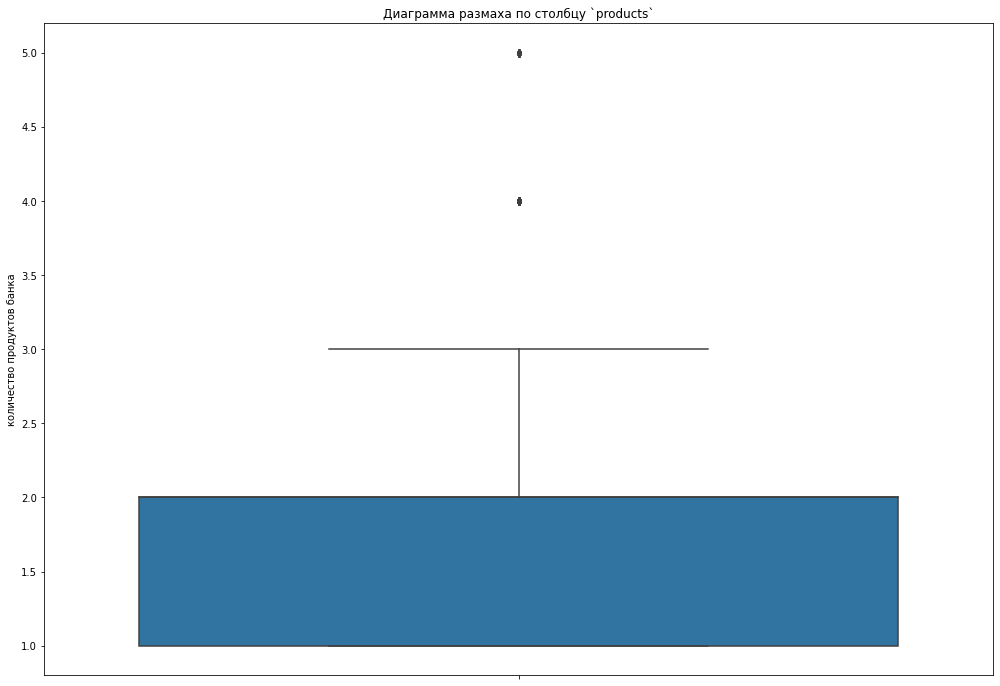

In [37]:
# посмотрим столбец на выбросы в ящике с усами
plt.figure(figsize=(17, 12))
sns.boxplot(y = 'products', data = df) 
plt.xlabel('')
plt.ylabel('количество продуктов банка')
plt.title('Диаграмма размаха по столбцу `products`');

- клиентов с 4 и 5 продуктами так мало (493), что боксплот их рисует как выбросы
- однаком, как мы уже выяснили, чем богаче клиент, тем большим количествомм продуктов он пользуется, а с богатыми клиентами у нас проблемы (отток - 49%)
- оставим выбросы для анализа

In [38]:
# посмотрим на аномальных клиентов
df.query('products > 3').describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,female,male,rostov,rybinsk,yaroslavl
count,416.000000,416.000000,416.000000,416.000000,4.160000e+02,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,169183.435096,867.629808,38.915865,4.057692,8.322638e+05,4.045673,0.670673,0.817308,118443.985577,0.588942,0.399038,0.600962,0.151442,0.216346,0.632212
std,35535.220344,35.338194,9.548867,1.513486,5.220218e+05,0.209026,0.470535,0.386879,71633.896282,0.492618,0.490290,0.490290,0.358911,0.412249,0.482784
min,95384.000000,768.000000,19.000000,0.000000,7.703050e+03,4.000000,0.000000,0.000000,5043.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,139224.250000,844.000000,32.000000,3.000000,3.865821e+05,4.000000,0.000000,1.000000,67569.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,168787.500000,866.000000,37.000000,4.000000,6.975391e+05,4.000000,1.000000,1.000000,107582.500000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,198262.250000,893.000000,44.000000,5.000000,1.277436e+06,4.000000,1.000000,1.000000,152337.500000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,228655.000000,963.000000,62.000000,9.000000,1.980526e+06,5.000000,1.000000,1.000000,583966.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- 416 клиента
- пол - мужчины (60%) и женщины (40%)
- средний скоринг - 866
- средний возраст - 37 
- оценка собственности - 4
- баланс - 697т.р.
- количество продуктов - 4
- кредитка - у 67%
- активность - 81%
- з/п - 107т.р.
- отток - 58%

#### Столбец `credit_card`

In [39]:
# посмотрим расперделение клиентов по столбцу `credit_card`
df['credit_card'].value_counts()

1    6509
0    2933
Name: credit_card, dtype: int64

- все четко: либо карта есть (68%), либо ее нет (32%)

#### Столбец `last_activity`

In [40]:
# посмотрим расперделение клиентов по столбцу `last_activity`
df['last_activity'].value_counts()

1    4931
0    4511
Name: last_activity, dtype: int64

- тут тоже не наблюдается каких либо проблем

#### Столбец `est_salary`

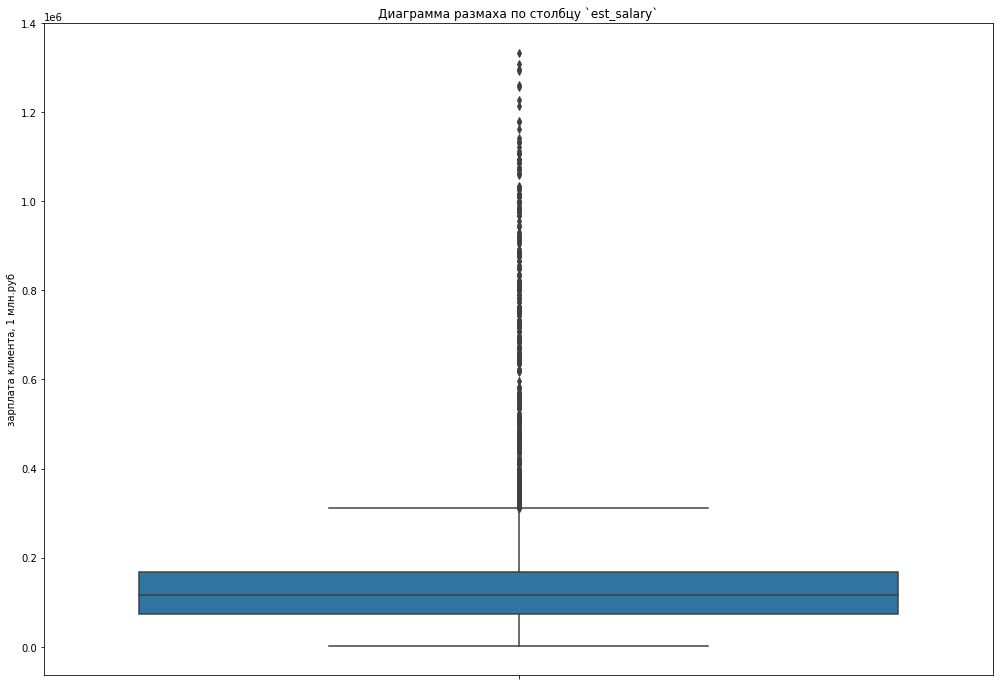

In [41]:
# посмотрим на выброчы по столбцу 'est_salary'
plt.figure(figsize=(17, 12))
sns.boxplot(y = 'est_salary', data = df) 
plt.xlabel('')
plt.ylabel('зарплата клиента, 1 млн.руб')
plt.title('Диаграмма размаха по столбцу `est_salary`');

Посмотрим повнимательнее на выбросы

In [42]:
# вытянем выбросы из диаграммы размаха
salary_blowouts = boxplot_stats(df.est_salary).pop(0)['fliers']
# перобразуем в панда сериас
series_salary_blowouts = pd.Series(data = salary_blowouts)
# применим дескрайб
series_salary_blowouts.describe()

count    3.890000e+02
mean     5.982139e+05
std      2.661929e+05
min      3.114640e+05
25%      3.590190e+05
50%      5.084460e+05
75%      7.925200e+05
max      1.333687e+06
dtype: float64

In [43]:
# посмотрим на аномальных клиентов
df.query('est_salary > 324000').describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,female,male,rostov,rybinsk,yaroslavl
count,358.000000,358.000000,358.000000,358.000000,6.300000e+01,358.000000,358.000000,358.000000,3.580000e+02,358.000000,358.000000,358.000000,358.000000,358.00000,358.000000
mean,169465.720670,861.298883,42.405028,0.687151,9.035703e+05,1.360335,0.810056,0.555866,6.225714e+05,0.075419,0.421788,0.578212,0.030726,0.22905,0.740223
std,32492.198667,91.931698,11.046917,1.552950,5.531413e+05,0.640633,0.392806,0.497565,2.637133e+05,0.264436,0.494536,0.494536,0.172817,0.42081,0.439126
min,115473.000000,686.000000,24.000000,0.000000,6.610384e+04,1.000000,0.000000,0.000000,3.241400e+05,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,142095.250000,760.250000,34.000000,0.000000,4.237553e+05,1.000000,1.000000,0.000000,3.760005e+05,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,168132.500000,908.500000,40.000000,0.000000,8.340938e+05,1.000000,1.000000,1.000000,5.521115e+05,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000
75%,196327.000000,935.000000,48.750000,0.000000,1.329541e+06,2.000000,1.000000,1.000000,8.101105e+05,0.000000,1.000000,1.000000,0.000000,0.00000,1.000000
max,228876.000000,990.000000,78.000000,6.000000,1.995160e+06,4.000000,1.000000,1.000000,1.333687e+06,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


- 358 клиента
- пол - мужской (58%)и женский (42%)
- средний кредитный скоринг - 908
- средняя оценка собственности - 0
- баланс - 834т.р.
- 1 продукт банка
- есть кредитная карта у 81%
- активность - 55%
- з/п 552 т.р.
- отток - 7%
- преимущественно из Ростова (74%)

Это те же богатеи

Таким образом, получим следующее:
- нормальная з/п (попавшая в диаграмму размаха) - 0-324 т.р.
- зарплата богачей (выбросы) - 324т.р.-1,4млн.руб.

Для дальнейшего анализа сохраним датафрейм с "нормальной" зарплатой без выбрсоов

In [44]:
df = df.query('est_salary <= 324000')

#### Столбец `churn`

In [45]:
# посмотрим расперделение клиентов по столбцу `churn`
df['churn'].value_counts()

0    7503
1    1581
Name: churn, dtype: int64

- аномалий и выбросов не наблюдаем
- "средний по больнице" отток - 18.2%

In [46]:
# посмотрим на результаты 
print('датасет под "нормального" клиента')
print(df.info())

датасет под "нормального" клиента
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9084 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9084 non-null   int64  
 1   score          9084 non-null   int64  
 2   city           9084 non-null   object 
 3   gender         9084 non-null   object 
 4   age            9084 non-null   int64  
 5   equity         9084 non-null   int64  
 6   balance        7158 non-null   float64
 7   products       9084 non-null   int64  
 8   credit_card    9084 non-null   int64  
 9   last_activity  9084 non-null   int64  
 10  est_salary     9084 non-null   int64  
 11  churn          9084 non-null   int64  
 12  female         9084 non-null   uint8  
 13  male           9084 non-null   uint8  
 14  rostov         9084 non-null   uint8  
 15  rybinsk        9084 non-null   uint8  
 16  yaroslavl      9084 non-null   uint8  
dtypes: float64(1), int

- удалено 77 строк для обычного датафрейм датафрема (пропуски в столбце `age`, явные мелкие выбросы, неявные дубликаты) и 2810 для описания нормального клиента
- созданы дополнительные выборки с нормализованным балансом и зарплатой для дальнейшего анализа
- пропуски по сбалансу оставлены, заменить их нечем, для "нормального" - удалены

In [47]:
# проверяем результат
display(df)
print(df.info())

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,female,male,rostov,rybinsk,yaroslavl
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719,1,1,0,0,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621,0,1,0,0,1,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683,0,1,0,0,1,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423,1,1,0,0,0,1
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814,Рыбинск,М,27,1,78144.65,1,0,1,18943,0,0,1,0,1,0
9996,139170,894,Ярославль,М,46,0,NaN,1,1,0,196898,0,0,1,0,0,1
9997,115639,903,Ярославль,М,24,0,NaN,2,1,1,108905,0,0,1,0,0,1
9998,148700,777,Ярославль,Ж,68,3,865457.97,3,0,1,86874,0,1,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9084 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9084 non-null   int64  
 1   score          9084 non-null   int64  
 2   city           9084 non-null   object 
 3   gender         9084 non-null   object 
 4   age            9084 non-null   int64  
 5   equity         9084 non-null   int64  
 6   balance        7158 non-null   float64
 7   products       9084 non-null   int64  
 8   credit_card    9084 non-null   int64  
 9   last_activity  9084 non-null   int64  
 10  est_salary     9084 non-null   int64  
 11  churn          9084 non-null   int64  
 12  female         9084 non-null   uint8  
 13  male           9084 non-null   uint8  
 14  rostov         9084 non-null   uint8  
 15  rybinsk        9084 non-null   uint8  
 16  yaroslavl      9084 non-null   uint8  
dtypes: float64(1), int64(9), object(2), uint8(5)
memory 

<div style="border:solid black 3px; padding: 20px">

**Выводы по шагу 1**

В ход шага предобработки данных нами выполнено следубщее:
- нами загружен датасет о клиентах банка, содержащий 10000 строк
- название столбцов приведены к "змеиному" регистру
- удалены строки с пропусками в столбце `age`
- удалено 76 строк датафрема (всего 0,7% от датасета: пропуски в столбце `age`, явные мелкие выбросы, неявные дубликаты)
- созданы дополнительные выборки с нормализованным балансом и зарплатой для дальнейшего анализа
- пропуски в столбце `balance`оставлены, заменить их нечем
- часть столбцов (`score`, `age`, и `est_salary`) приведены к целочисленному значению
- часть столбцов (`gender` и `city`) приведены к бинарному значению методом get_dummies
    
**Выделены аномлаьные клиенты**
    
1. столбец `score` (скоринговый рейтинг меньше 653
    - всего 24 клиента
    - пол - мужчины (62%) и женщины (38%)
    - средний возраст - 39
    - 1 продукт банка
    - оценка собственности - 0
    - баланс неизвестен
    - кредитная карта - есть у всех
    - без оттока
    - активность - 70%
    - в бОльшей степени из Ярославля (66%) и Рыбинска (29%)
        
    
2. Столбец `age` (возраст 79 лет и более)
    - всего 22 клиента
    - пол - женщины (100%)
    - средний возраст - 81
    - 2 продукта банка
    - оценка собственности - 3
    - баланс 546 т.р.
    - кредитная карта - есть у 54%
    - отток - 4%
    - активность - 68%
    - з/п - 62т.р.
    - в бОльшей степени (относительно долей датасета) -  из Рыбинска (36%)
    
    
3. Столбец `balance` (баланс более 2 млн.руб)
    - 427 клиента
    - средний кредитный скоринг - 927
    - средняя оценка собственности - 5
    - баланс - 2,9 млн.р.
    - 2 продукта банка
    - есть кредитная карта у 45%
    - з/п 231 т.р.
    - отток - 49%
    
    
3. Столбец `balance` (отсутствие информации о балансе, не убирали из датасета)
    - 2221 клиента
    - пол - мужской (56%)и женский (44%)
    - средний кредитный скоринг - 903
    - средняя оценка собственности - 0
    - баланс - неизвестен
    - 1 продукт банка
    - есть кредитная карта у 81%
    - активность - 54%
    - з/п 175 т.р.
    - отток - 0,5%    
    
    
4. Столбец `products` (больше 3 банковских продуктов, не убирали из датасета)    
    - 416 клиента
    - пол - мужчины (60%) и женщины (40%)
    - средний скоринг - 866
    - средний возраст - 37 
    - оценка собственности - 4
    - баланс - 697т.р.
    - количество продуктов - 4
    - кредитка - у 67%
    - активность - 81%
    - з/п - 107т.р.
    - отток - 58%
    
    
4. Столбец `est_salary` (з/п больше 324 т.р.)   
    - 358 клиента
    - пол - мужской (58%)и женский (42%)
    - средний кредитный скоринг - 908
    - средняя оценка собственности - 0
    - баланс - 834т.р.
    - 1 продукт банка
    - есть кредитная карта у 81%
    - активность - 55%
    - з/п 552 т.р.
    - отток - 7%
    - преимущественно из Ростова (74%)

<a id='8'></a>
## Шаг 2. Исследовательский анализ данных

<a id='9'></a>
### Описание типичных клиентов по столбцам

Для предварительного описания типичных клиентов банка применим метод .describe() к датасету всех нормальных пользователей

In [48]:
# посмотрим на оригинальный датасет
df_original.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,female,male,rostov,rybinsk,yaroslavl
count,9927.000000,9927.000000,9923.000000,9927.000000,7.667000e+03,9927.000000,9927.000000,9927.000000,9.927000e+03,9927.000000,9927.000000,9927.000000,9927.000000,9927.000000,9927.000000
mean,171739.076257,848.735973,42.729215,2.634633,8.289016e+05,1.871562,0.679863,0.523522,1.478909e+05,0.183338,0.499144,0.500856,0.142742,0.267352,0.589906
std,33696.488963,65.392866,12.177008,1.979286,1.985272e+06,0.792955,0.466552,0.499472,1.393658e+05,0.386963,0.500024,0.500024,0.349827,0.442600,0.491875
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142720.000000,802.000000,33.000000,0.000000,2.952611e+05,1.000000,0.000000,0.000000,7.525150e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,172651.000000,853.000000,40.000000,3.000000,5.248943e+05,2.000000,1.000000,1.000000,1.197110e+05,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,201160.500000,900.000000,51.000000,4.000000,9.808015e+05,2.000000,1.000000,1.000000,1.746725e+05,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
# посмотрим на датасет без аномалий
df.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,female,male,rostov,rybinsk,yaroslavl
count,9084.000000,9084.000000,9084.000000,9084.000000,7.158000e+03,9084.000000,9084.000000,9084.000000,9084.000000,9084.000000,9084.000000,9084.000000,9084.000000,9084.000000,9084.000000
mean,171680.616028,845.390907,42.530053,2.642228,6.111817e+05,1.867459,0.684610,0.520916,121134.501871,0.174042,0.508036,0.491964,0.150374,0.271907,0.577719
std,33628.629635,61.992562,12.120513,1.955219,4.290891e+05,0.777195,0.464696,0.499590,63738.629539,0.379167,0.499963,0.499963,0.357458,0.444967,0.493950
min,94561.000000,654.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2546.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142523.250000,801.000000,33.000000,1.000000,2.854636e+05,1.000000,0.000000,0.000000,72025.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,172707.000000,848.000000,40.000000,3.000000,4.871913e+05,2.000000,1.000000,1.000000,113258.500000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,201147.250000,894.000000,51.000000,4.000000,8.674294e+05,2.000000,1.000000,1.000000,161908.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,229145.000000,999.000000,78.000000,9.000000,1.999799e+06,5.000000,1.000000,1.000000,323502.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Что поменялось в средних по столбцам?

1. Немного упал кредитный скоринг
2. Равномернее по фрейму стало распределение оценки собственности клиентов
3. Медианный баланс уменьшился почти на 1млн.руб., разница между медианным и средним балансом уменьшилас с 3млн.руб до 1 млн.руб
4. Медианная з/п уменьшилась на 5 тыс.руб., а разница между медианной и средней з/п уменьшилась с 30тыс. до 10 тыс. руб.
5. Средний отток уменьшился на 1%
6. Распределение по полу практически не изменилось
7. Распредление по городам так же практически не изменилось

**Теперь мы выяснили портрет среднего пользовтаеля (очищенного от аномалий датасета)**

- осталось 9084 клиента (потери - почти 10%)
- мужчины и женщины разделены практически по ровну (49/51)
- 58% из Ярославля, 27% из Рыбинска, 15% из Ростова
- средняя (здесь и далее - медианная, как устойчивая к выбросам) оценка кредитного скоринга - 848 балла
- средний возраст - 40 лет
- средняя оценка собственности - 3
- медианный баланс - 487 тыс.руб., средний баланс - 611 тыс.руб.
- среднее количество используемыех продуктов - 2
- медианная з/п - 113 тыс.руб., средняя з/п - 121 тыс.руб. 
- отточные клиенты в среднем (без сегментации) состовляют 17,4%
- аж 68% клиентов банка имеют кредитную карту

<a id='10'></a>
### Визуализация распределения отточных и оставшихся клиентов по столбцам

#### Кредитный скоринг

Построим гистограмму по столюбцу `score`  с рапсределением оставшихся и отточных клиентов

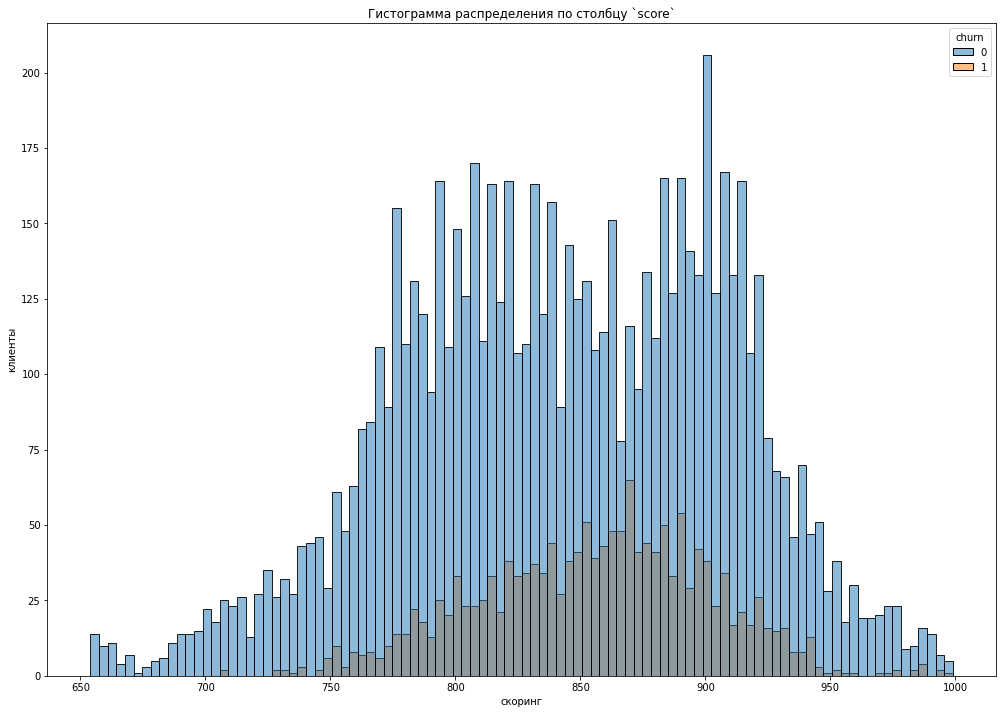

In [50]:
plt.figure(figsize=(17, 12))
sns.histplot(x = 'score', hue = 'churn', bins = 100, data = df)
plt.ylabel('клиенты')
plt.xlabel('скоринг')
plt.title('Гистограмма распределения по столбцу `score`');

- больше всего пользовтаелей со скоринговым рейтингом 770-930 баллов
- всплески отточных клиентов по форме примерно соответсвуют распределению оставшихся

На этих данных построим нормализированную гистограмму

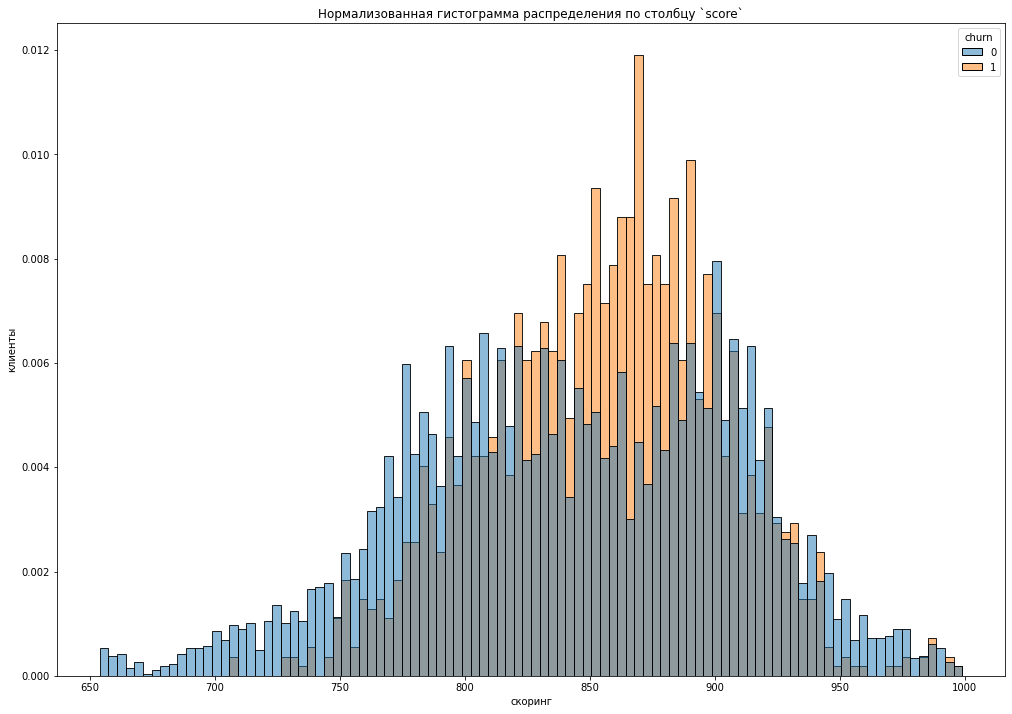

In [51]:
plt.figure(figsize=(17, 12))
sns.histplot(x = 'score', stat='density' , common_norm = False, hue = 'churn', bins = 100, data = df)
plt.ylabel('клиенты')
plt.xlabel('скоринг')
plt.title('Нормализованная гистограмма распределения по столбцу `score`');

- наблюдается явная проблема с клиентами с кредитной оценкой 830-900

#### Возраст клиентов

Построим гистограмму по столюбцу `age`  с рапсределением оставшихся и отточных клиентов

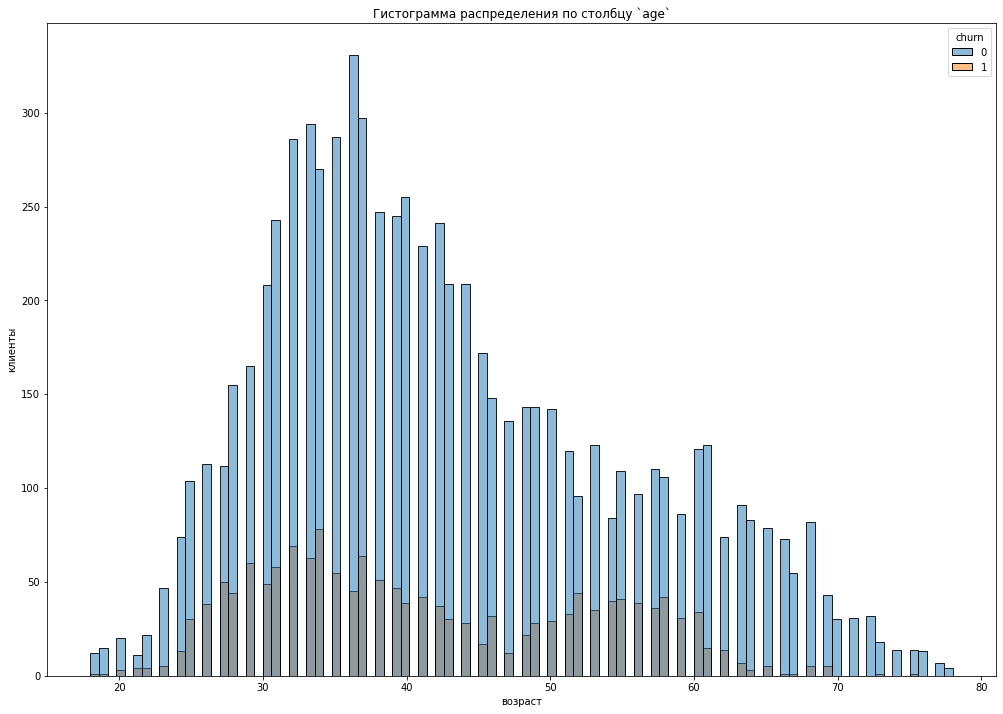

In [52]:
plt.figure(figsize=(17, 12))
sns.histplot(x = 'age', hue = 'churn', bins = 100, data = df)
plt.ylabel('клиенты')
plt.xlabel('возраст')
plt.title('Гистограмма распределения по столбцу `age`');

- больше всего клиентов в возрасте 25-50 лет
- всплески отточных клиентов по форме примерно соответсвуют распределению оставшихся

На этих данных построим нормализированную гистограмму

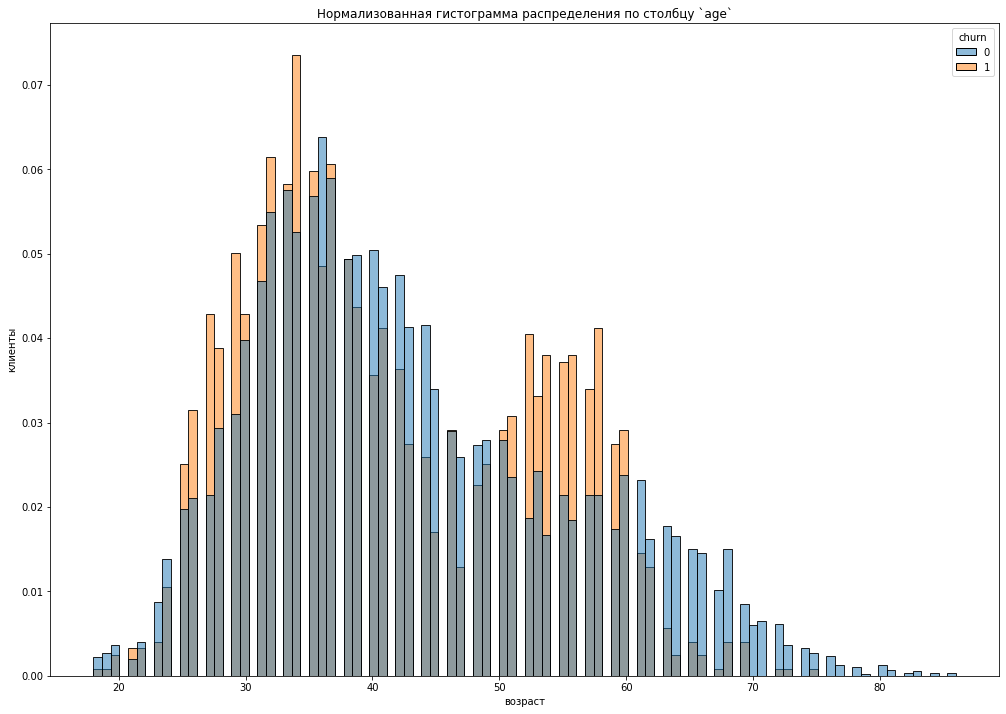

In [53]:
plt.figure(figsize=(17, 12))
sns.histplot(x = 'age', stat='density' , common_norm = False, hue = 'churn', bins = 100, data = df_norm)
plt.ylabel('клиенты')
plt.xlabel('возраст')
plt.title('Нормализованная гистограмма распределения по столбцу `age`');

- Обнаружены проблемные возрасты для оттока - 25-35 года и 50-61 лет
- Обнаружены "хорошие" (с низким процентом оттока) возрасты клиентов: 36-50 и 62-78 лет

#### Города клиентов

Осущиствим группировку данных по городам, добавим расчетные столбцы - процент от датасета и процент оттока внутри категории (города)

In [58]:
# осуществим группировку и добавим расчетные столбцы
df_city = df_norm.groupby(['city']).agg({'userid':'count', 'churn': 'sum'})
df_city.columns = ['clients_count', 'churned']
df_city['clients_rate'] = (df_city.clients_count / df_city.clients_count.sum() * 100).round(1)
df_city['churn_rate'] = (df_city['churned'] / df_city['clients_count'] * 100).round(1)
df_city

,clients_count,churned,clients_rate,churn_rate
city,,,,
Ростов,1417,266,14.3,18.8
Рыбинск,2653,436,26.7,16.4
Ярославль,5856,1117,59.0,19.1


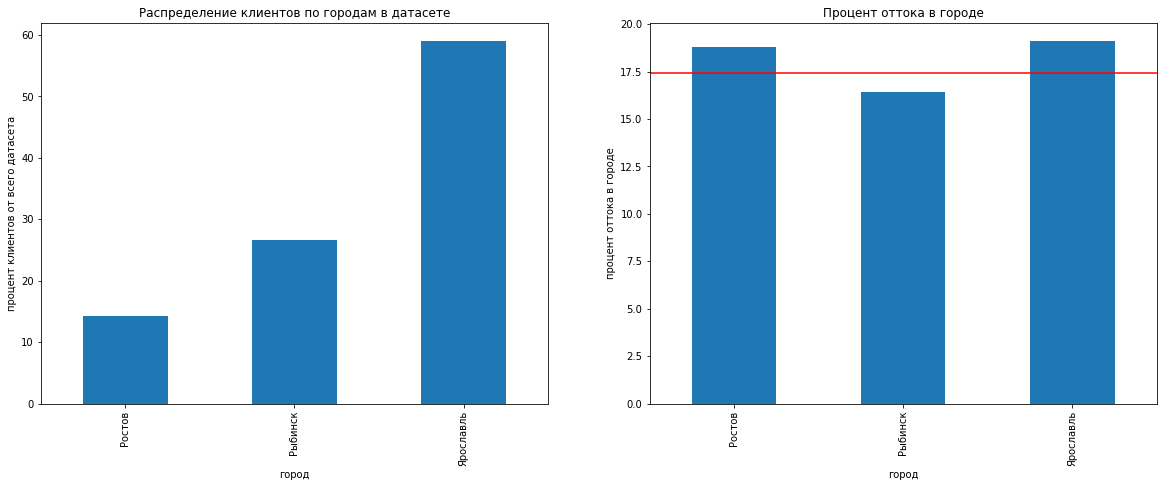

In [59]:
#построим визуализации
plt.figure(figsize=(20, 7))

ax1 = plt.subplot(1, 2, 1)
ax1 = df_city['clients_rate'].plot(kind='bar')
plt.ylabel('процент клиентов от всего датасета')
plt.xlabel('город')
plt.title('Распределение клиентов по городам в датасете')

ax2 = plt.subplot(1, 2, 2)
ax2 = df_city['churn_rate'].plot(kind='bar')
plt.axhline(y=17.4, color='r', linestyle='-')
plt.ylabel('процент оттока в городе')
plt.xlabel('город')
plt.title('Процент оттока в городе');

- больше всего клиентов из Ярославля (59%), меньше всего - из Ростова (14,3 %)
- процентный отток распределен следующим образом - выше среднего оттока (17,4 %) - Ярослвль (19,1%) и Ростов (18,8%), ниже -  Рыбинск (16,4%)

#### Пол клиентов

Осущиствим группировку данных по полу, добавим расчетные столбцы - процент от датасета и процент оттока внутри категории (пола)

In [60]:
df_gender = df.groupby(['gender']).agg({'userid':'count', 'churn': 'sum'})
df_gender.columns = ['clients_count', 'churned']
df_gender['clients_rate'] = (df_gender.clients_count / df_gender.clients_count.sum() * 100).round(1)
df_gender['churn_rate'] = (df_gender['churned'] / df_gender['clients_count'] * 100).round(1)
df_gender

,clients_count,churned,clients_rate,churn_rate
gender,,,,
Ж,4615,575,50.8,12.5
М,4469,1006,49.2,22.5


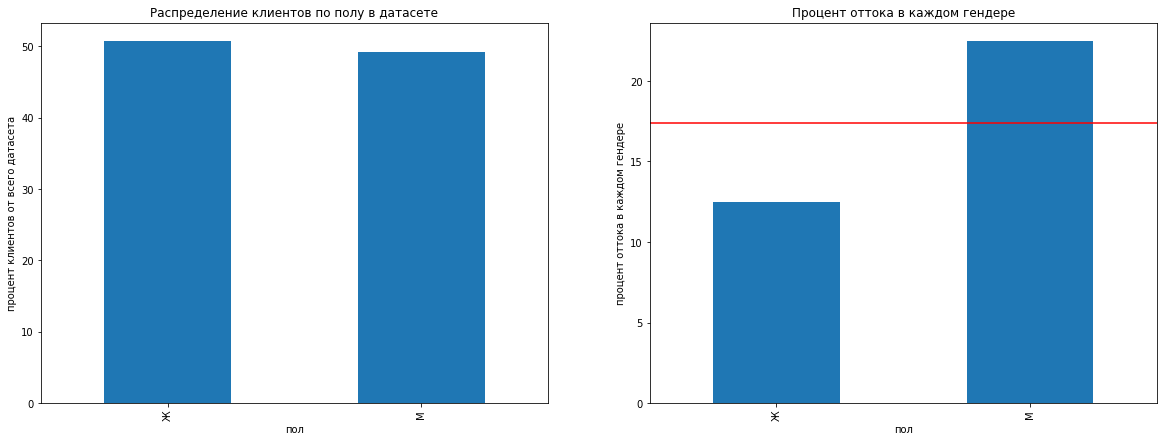

In [61]:
#построим визуализации
plt.figure(figsize=(20, 7))

ax1 = plt.subplot(1, 2, 1)
ax1 = df_gender['clients_rate'].plot(kind='bar')
plt.ylabel('процент клиентов от всего датасета')
plt.xlabel('пол')
plt.title('Распределение клиентов по полу в датасете')

ax2 = plt.subplot(1, 2, 2)
ax2 = df_gender['churn_rate'].plot(kind='bar')
plt.axhline(y=17.4, color='r', linestyle='-')
plt.ylabel('процент оттока в каждом гендере')
plt.xlabel('пол')
plt.title('Процент оттока в каждом гендере');

- мужчины и женщины в датасете распределены поровну
- процентный отток среди мужчин значительно превышает средний (17,4%) и составляет 22,5%,  отток среди женщин - 12,5%

#### Оценка ктивов клиентов

Осущиствим группировку данных по оценке активов клиентов, добавим расчетные столбцы - процент от датасета и процент оттока внутри категории (оценки активов клиентов)

In [62]:
df_equity = df_norm.groupby(['equity']).agg({'userid':'count', 'churn': 'sum'})
df_equity.columns = ['clients_count', 'churned']
df_equity['clients_rate'] = (df_equity.clients_count / df_equity.clients_count.sum() * 100).round(1)
df_equity['churn_rate'] = (df_equity['churned'] / df_equity['clients_count'] * 100).round(1)
df_equity

,clients_count,churned,clients_rate,churn_rate
equity,,,,
0,2554,90,25.7,3.5
1,772,93,7.8,12.0
2,1046,166,10.5,15.9
3,1532,321,15.4,21.0
4,1841,464,18.5,25.2
5,1911,577,19.3,30.2
6,161,58,1.6,36.0
7,79,37,0.8,46.8
8,17,6,0.2,35.3


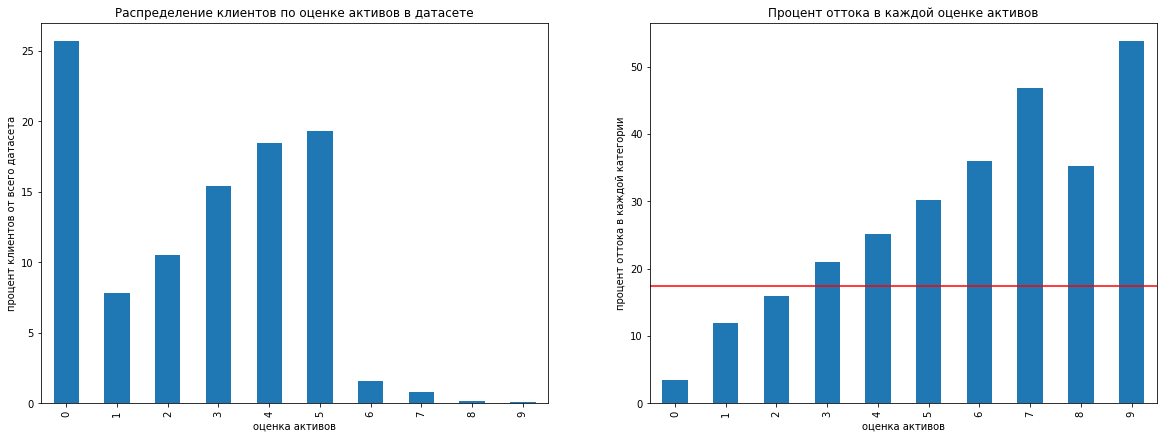

In [63]:
#построим визуализации
plt.figure(figsize=(20, 7))

ax1 = plt.subplot(1, 2, 1)
ax1 = df_equity['clients_rate'].plot(kind='bar')
plt.ylabel('процент клиентов от всего датасета')
plt.xlabel('оценка активов')
plt.title('Распределение клиентов по оценке активов в датасете')

ax2 = plt.subplot(1, 2, 2)
ax2 = df_equity['churn_rate'].plot(kind='bar')
plt.axhline(y=17.4, color='r', linestyle='-')
plt.ylabel('процент оттока в каждой категории')
plt.xlabel('оценка активов')
plt.title('Процент оттока в каждой оценке активов');

- большая часть клиентов имеет оценку активов 0(25,7%), 5(19,3%) и 4(18,4%)
- с ростом оценки активов клиентов наблюдается прогрессия роста оттока в каждой из групп клиентов
- отток ниже среднего (17,4%) у клиентов с оценкой активов 0(3,5%), 1(12,0%) и 2(15,9%)
- отток выше среднего у клиентов с оценкой активов 9(53,8%), 7(46,8%) и 6(35,3%)
- в очередной раз подтверждается наше предположение, что чем богаче клиент - тем с большей вероятностью он уйдет из банка

#### Баланс клиентов

- Ранее бы выяснили, что сверхбогатые клиент сильно искажают данные обычных клиентов (по балансу на счетах)
- Построим гистограмму по столюбцу `balance` с рапсределением оставшихся и отточных клиентов (но только по обычным клиентами, с богатыми все и так ясно)

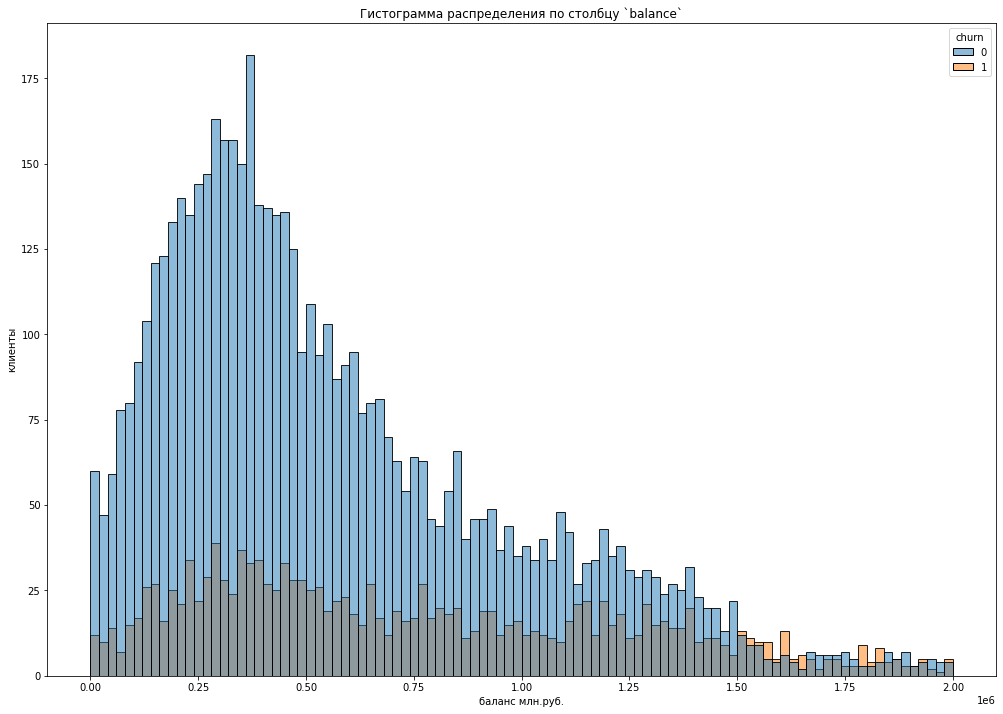

In [64]:
fig = plt.figure(figsize=(17, 12))
sns.histplot(x = 'balance', hue = 'churn', bins = 100 , data = df)
plt.ylabel('клиенты')
plt.xlabel('баланс млн.руб.')
plt.title('Гистограмма распределения по столбцу `balance`');

- больше всего клиентов с балансом 0-750 т.р. отток среди них минимальный
- с ростом баланса клиента отток так же растет

На этих данных построим нормализированную гистограмму

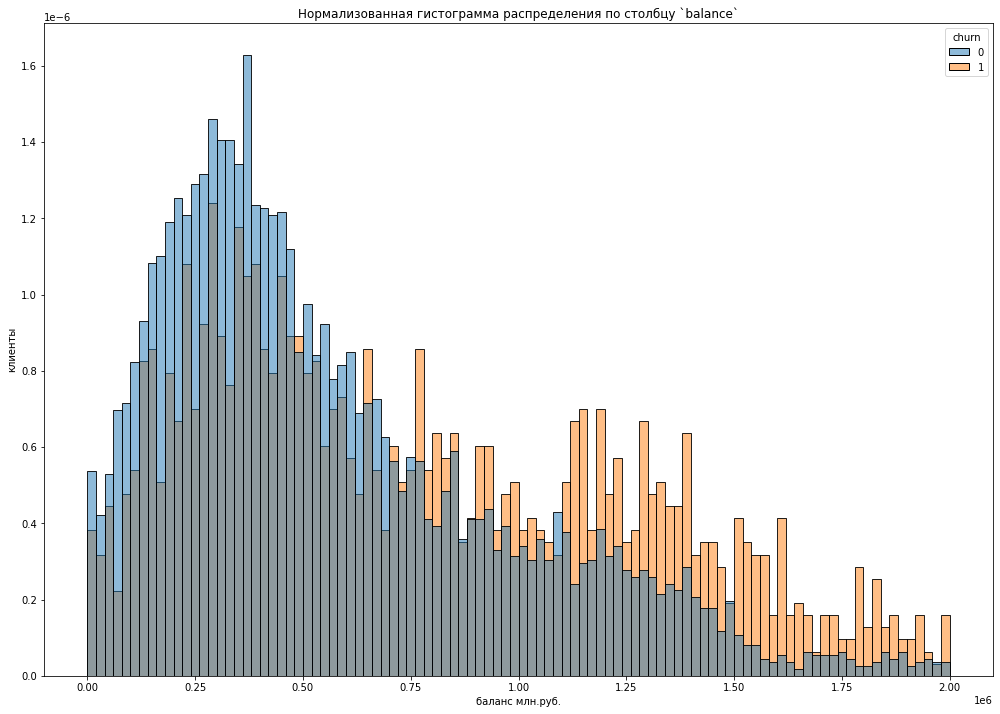

In [65]:
plt.figure(figsize=(17, 12))
sns.histplot(x = 'balance', stat='density' , common_norm = False, hue = 'churn', bins = 100, data = df)
plt.ylabel('клиенты')
plt.xlabel('баланс млн.руб.')
plt.title('Нормализованная гистограмма распределения по столбцу `balance`');

- мы наблюдаем процентный рост отточных клиентов с балансом примерно от 750 тыс.руб

#### Количество продуктов банка

Осущиствим группировку данных по количеству банковских продуктов, добавим расчетные столбцы - процент от датасета и процент оттока внутри категории (количество банковских продуктов)

In [66]:
df_products = df.groupby(['products']).agg({'userid':'count', 'churn': 'sum'})
df_products.columns = ['clients_count', 'churned']
df_products['clients_rate'] = (df_products.clients_count / df_products.clients_count.sum() * 100).round(1)
df_products['churn_rate'] = (df_products['churned'] / df_products['clients_count'] * 100).round(1)
df_products

,clients_count,churned,clients_rate,churn_rate
products,,,,
1,2976,221,32.8,7.4
2,4766,865,52.5,18.1
3,931,254,10.2,27.3
4,392,233,4.3,59.4
5,19,8,0.2,42.1


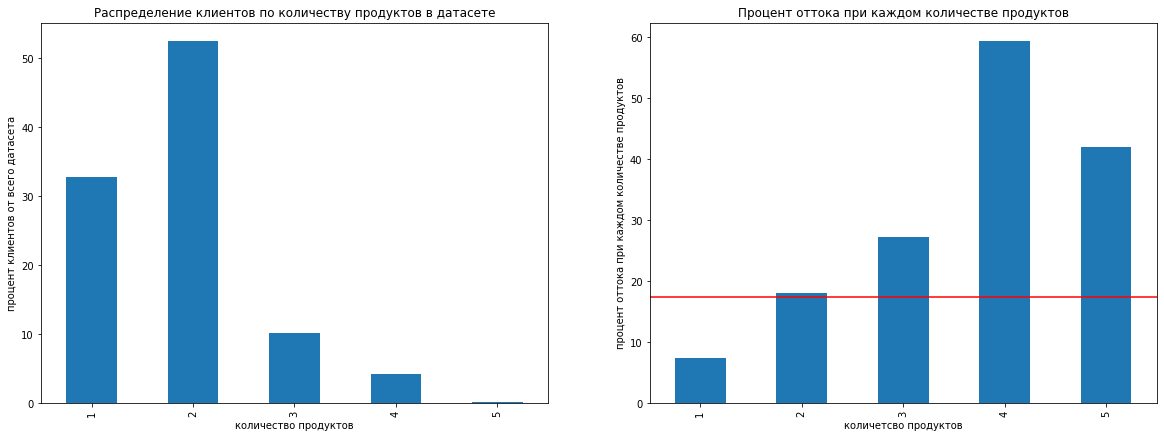

In [67]:
#построим визуализации
plt.figure(figsize=(20, 7))

ax1 = plt.subplot(1, 2, 1)
ax1 = df_products['clients_rate'].plot(kind='bar')
plt.ylabel('процент клиентов от всего датасета')
plt.xlabel('количество продуктов')
plt.title('Распределение клиентов по количеству продуктов в датасете')

ax2 = plt.subplot(1, 2, 2)
ax2 = df_products['churn_rate'].plot(kind='bar')
plt.axhline(y=17.4, color='r', linestyle='-')
plt.ylabel('процент оттока при каждом количестве продуктов')
plt.xlabel('количетсво продуктов')
plt.title('Процент оттока при каждом количестве продуктов');

- больше всего клиентов с 1-2 продуктами
- резкое снижение количества пользователей с 3 продуктами и более
- очень низкий процент отточных клиентов с 1 продуктом (7,4%)
- отток выше среднего уже с 2х продуктов на клиента (18,1%), экспонентный рост процента отточных клиентов c ростом количества продуктов банка
- в очередной раз подтверждается наше предположение, что чем богаче клиент - тем с большей вероятностью он уйдет из банка

In [68]:
df_full = df_full.query('products >= 1')

#### Кредитные карты

Осущиствим группировку данных по ользователям кредитных карт, добавим расчетные столбцы - процент от датасета и процент оттока внутри категории

In [69]:
df_cd = df.groupby(['credit_card']).agg({'userid':'count', 'churn': 'sum'})
df_cd.columns = ['clients_count', 'churned']
df_cd['clients_rate'] = (df_cd.clients_count / df_cd.clients_count.sum() * 100).round(1)
df_cd['churn_rate'] = (df_cd['churned'] / df_cd['clients_count'] * 100).round(1)
df_cd

,clients_count,churned,clients_rate,churn_rate
credit_card,,,,
0,2865,677,31.5,23.6
1,6219,904,68.5,14.5


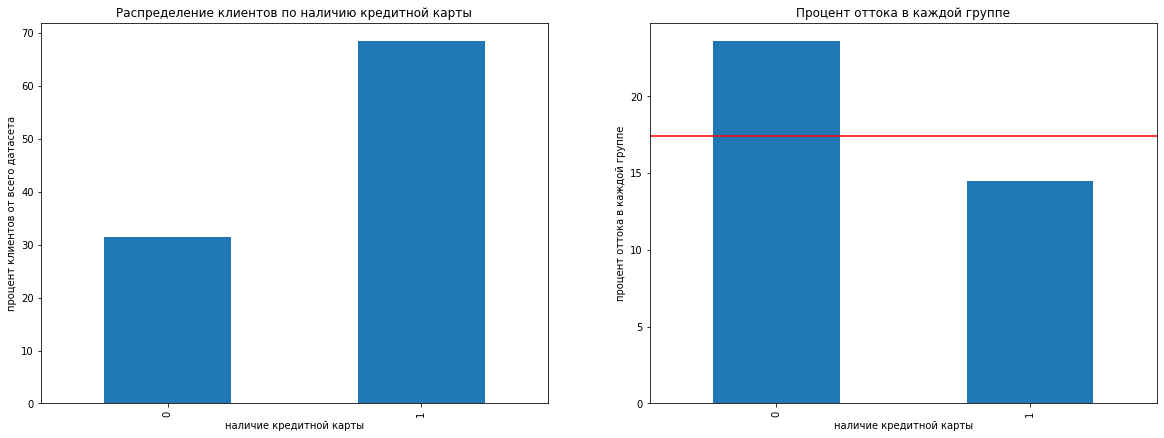

In [70]:
#построим визуализации
plt.figure(figsize=(20, 7))

ax1 = plt.subplot(1, 2, 1)
ax1 = df_cd['clients_rate'].plot(kind='bar')
plt.ylabel('процент клиентов от всего датасета')
plt.xlabel('наличие кредитной карты')
plt.title('Распределение клиентов по наличию кредитной карты')

ax2 = plt.subplot(1, 2, 2)
ax2 = df_cd['churn_rate'].plot(kind='bar')
plt.axhline(y=17.4, color='r', linestyle='-')
plt.ylabel('процент оттока в каждой группе')
plt.xlabel('наличие кредитной карты')
plt.title('Процент оттока в каждой группе');

- пользователей с кредитной картой значительно больше без таковой (распределение 68/32)
- наблюдается значительный отток клиентов без кредитной карты (23,6%)
- отток у пользовтаелей кредитной картой ниже среднего оттока - 14,5%

#### Активность клиентов

Осущиствим группировку данных по активности клиентов, добавим расчетные столбцы - процент от датасета и процент оттока внутри категории

In [71]:
df_last_activity = df.groupby(['last_activity']).agg({'userid':'count', 'churn': 'sum'})
df_last_activity.columns = ['clients_count', 'churned']
df_last_activity['clients_rate'] = (df_last_activity.clients_count / df_last_activity.clients_count.sum() * 100).round(1)
df_last_activity['churn_rate'] = (df_last_activity['churned'] / df_last_activity['clients_count'] * 100).round(1)
df_last_activity

,clients_count,churned,clients_rate,churn_rate
last_activity,,,,
0,4352,473,47.9,10.9
1,4732,1108,52.1,23.4


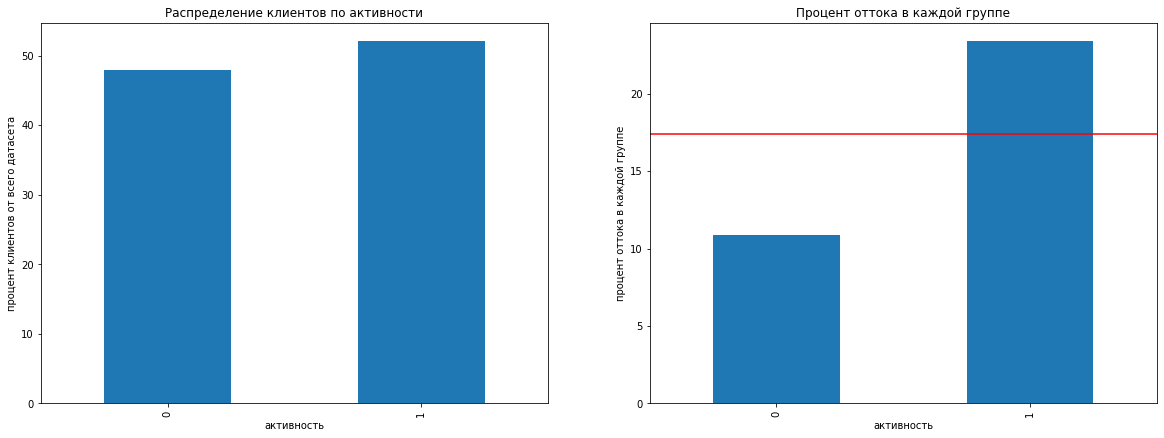

In [72]:
#построим визуализации
plt.figure(figsize=(20, 7))

ax1 = plt.subplot(1, 2, 1)
ax1 = df_last_activity['clients_rate'].plot(kind='bar')
plt.ylabel('процент клиентов от всего датасета')
plt.xlabel('активность')
plt.title('Распределение клиентов по активности')

ax2 = plt.subplot(1, 2, 2)
ax2 = df_last_activity['churn_rate'].plot(kind='bar')
plt.axhline(y=17.4, color='r', linestyle='-')
plt.ylabel('процент оттока в каждой группе')
plt.xlabel('активность')
plt.title('Процент оттока в каждой группе');

- активных клиентов чуть больше (52/48)
- отток у активных пользовтаелей значительно выше среднего - 23,4%
- отток у неактивных пользовтаелей значительно ниже среднего - 10,9%

#### Зарплата клиентов

- Ранее бы выяснили, что сверхбогатые клиент сильно искажают данные обычных клиентов (по з/п)
- Построим гистограмму по столюбцу `est_salary` с рапсределением оставшихся и отточных клиентов (но только по обычным клиентами, с богатыми все и так ясно)

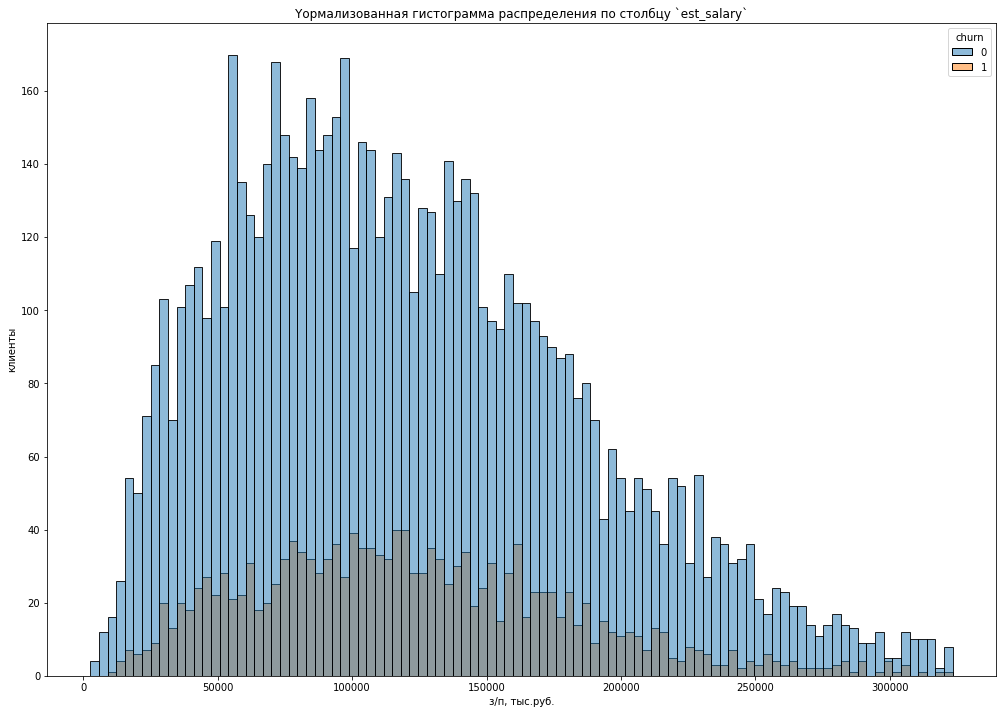

In [73]:
plt.figure(figsize=(17, 12))
sns.histplot(x = 'est_salary', hue = 'churn', bins = 100, data = df)
plt.ylabel('клиенты')
plt.xlabel('з/п, тыс.руб.')
plt.title('Yормализованная гистограмма распределения по столбцу `est_salary`');

- больше всего клиентов с з/п 20-200т.р.

На этих данных построим ннормализованную гистограмму

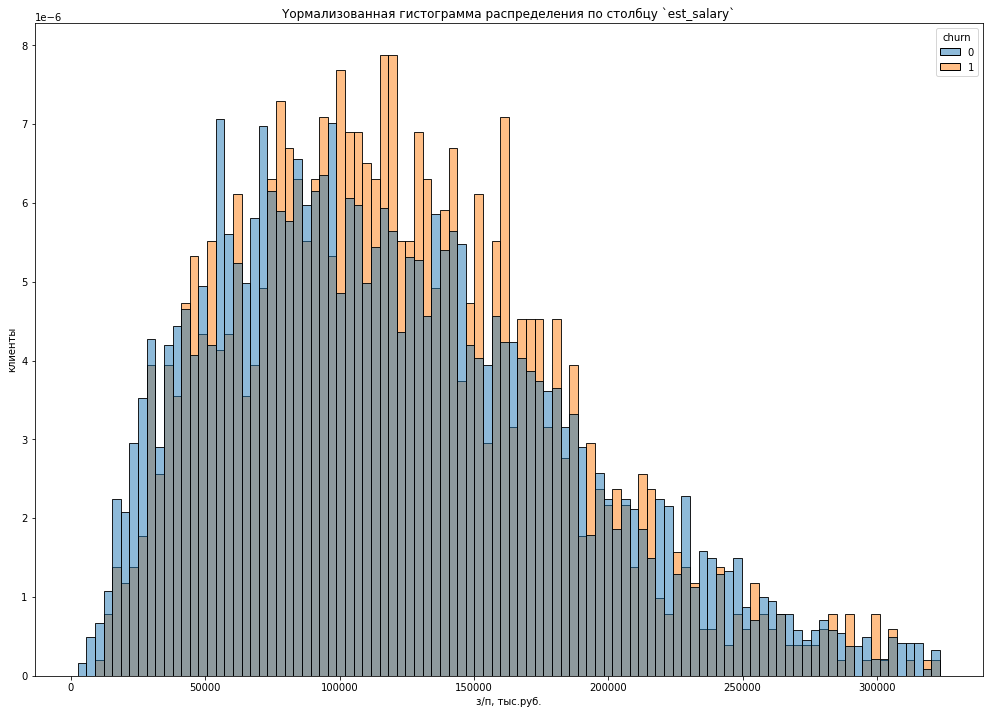

In [74]:
plt.figure(figsize=(17, 12))
sns.histplot(x = 'est_salary', stat='density' , common_norm = False, hue = 'churn', bins = 100,\
             data = df)
plt.ylabel('клиенты')
plt.xlabel('з/п, тыс.руб.')
plt.title('Yормализованная гистограмма распределения по столбцу `est_salary`');

- выявлен высокий отток клиентов с з/п 100-230 тыс. рублей

<a id='11'></a>
### Матрица корреляции

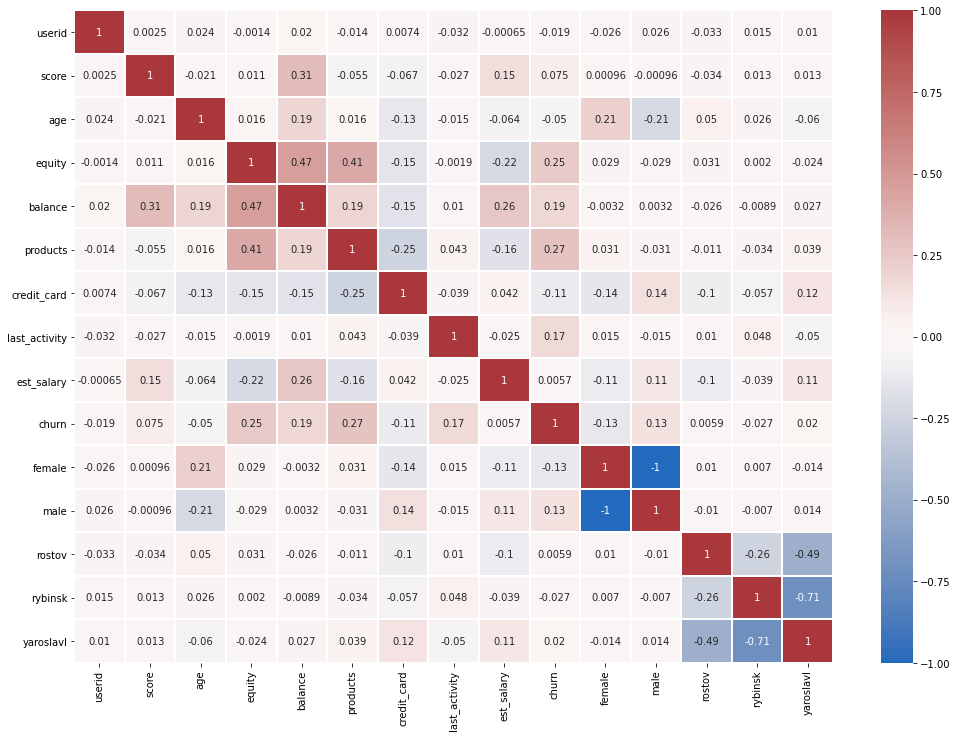

In [75]:
# построим тепловую карту по общей матрице корреляции по датасету
plt.figure(figsize=(17, 12))
sns.heatmap(df.corr(), annot = True, cmap='vlag', linewidths = 1);

Для упрощения визуализации построим хитмэп корреляции тоько по столбцу `churn`

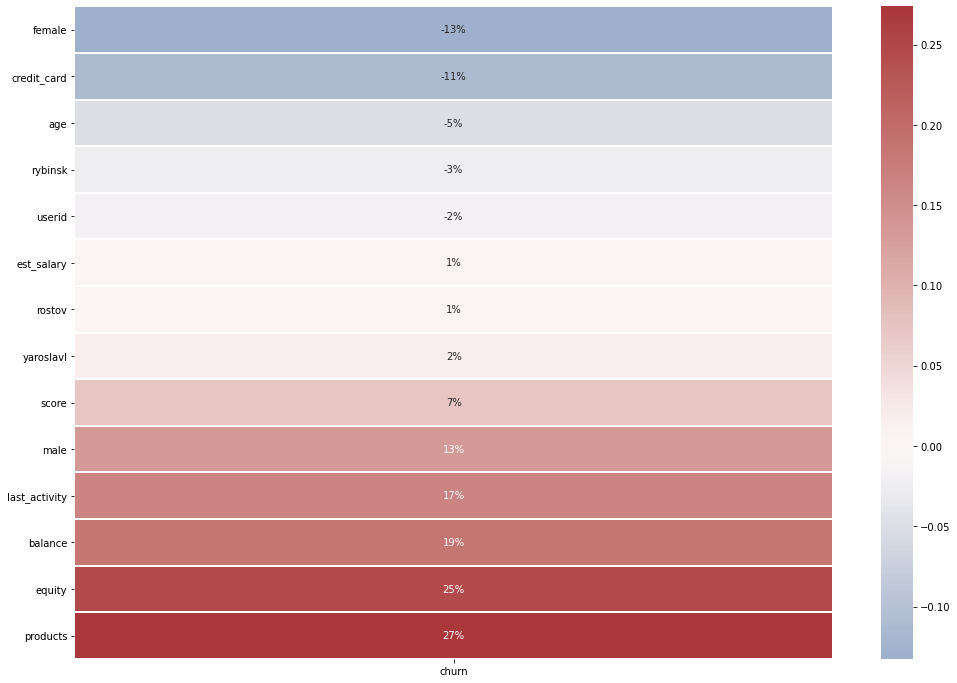

In [76]:
plt.figure(figsize=(17, 12))
sns.heatmap(df.corr()\
              .loc[:,['churn']]\
              .drop('churn')\
              .sort_values('churn'), annot = True, cmap='vlag', fmt = ".0%", center = 0, linewidths = 1);

- признаков, оказываающих сильное влияние на отток не выявлено
- небольшая положительная корреляция с оттоком выявлена у количества продуктов банка (27%), оценкой собственности клиента (25%), балансом (19%), активностью клиента (17%) мужским полом (14%), скоринговым рейтингом (11%) и балансом на счете (9%)
- небольшая отрицательная корреляция с оттоком выявлена у женского пола (13%), с наличием кредитной карты (11%)

<div style="border:solid black 3px; padding: 20px">

**Выводы по шагу 2**

В ход шага исследовательского анализа данных нами выполнено следубщее:

**1. Описание типичных клиентов по столбцам**  
   - после предобработки датасет содержит **9084 уникальных клиентов**
   - мужчины и женщины разделены по ровну (49/50)
   - 58% из Ярославля, 27% из Рыбинска, 15% из Ростова
   - средняя оценка кредитного скоринга - **848 балла**
   - средний возраст - **40 лет**
   - средняя оценка собственности - **3**
   - медианный баланс - **487 тыс.руб.**, средний баланс - **611 тыс.руб.**
   - медианная з/п - **113 тыс.руб.**, средний баланс - **121 тыс.руб**.
   - среднее количество используемыех продуктов - **2**
   - отточные клиенты в среднем (без сегментации) состовляют **17,4%**
   - аж **68%** клиентов банка имеют кредитную карту
    
    
**2. Путем построения обычных и нормализованных гистограмм найдены отличия в распределениях оставшихся и отточных клиентов по каждому столбцу:**
   - наблюдается явная проблема с оттоком клиентов с кредитной оценкой **830-900**
   - возрас оттока - **26-34 года и 50-60 лет**, возраст оставшихся клиентов **35-50 и 61-78 лет**
   - хуже всего с оттоком обстоят дела в **Ярославле** (как в процентном, так и в абсолютном значениях)
   - отток **мужчин** значительно превышает отток женщин
   - большая часть клиентов имеет **оценку активов 0-2**, наблюдается значительный отток клиентов с оценкой активов **2 и более**
   - больше всего клиентов с балансом **0-750 т.р.** отток среди них минимальный, с ростом баланса клиента отток так же растет
   - больше всего клиентов с **1-2 продуктами**. наблюдается экспонентный рост процента отточных клиентов для клиентов с **2 и более количеством продуктов банка**
   - примерно у **68**% клиентов есть кредитная карта, при этом процентный отток выше у клиентов без кредитной карты
   - активные и неактивные пользователи разделены приблизительно в равных долях. отток у активных пользовтаелей выше
   - больше всего клиентов с **з/п 20-200т.р.**, больший отток у сегмента з/п **100-230 тыс. руб.**


**3. Построение хитмэпа по матрице общей корреляции**
   - признаков, оказываающих сильное влияние на отток **не выявлено**
   - небольшая положительная корреляция с оттоком выявлена у **количества продуктов банка (27%)**, **оценкой собственности клиента (25%)**, **балансом (19%), **активностью клиента (17%)**, **мужским полом (14%)**,  **скоринговым рейтингом (11%)** и **балансом на счете (9%)**, 
   - небольшая отрицательная корреляция с оттоком выявлена у **женского пола (13%)**, с **наличием кредитной карты (11%)**

<a id='12'></a>
## ШАГ 3. Проверка статистичеких гипотез.

<a id='13'></a>
### ГИПОТЕЗА 1. Различие в возрасте между клиентами, пользующиеся 1 продуктом банка, и пользовтаелями, использующими 2 продуктами

- Н0 - Нулевая гипотеза - различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, нет

- Н1 - Алтернативная гипотеза - различие возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, есть

Зададим уровень статистической значимости alpha - 5% (0.05)

In [77]:
# объявим новые переменные, содержащие информацию о возрастах клиентов, имеющих 1 или 2 продукт
h_1_1 = df.query('products == 1')['age']
h_1_2 = df.query('products == 2')['age']

Прежде, чем выбрать метод проверки статистическиой гипотезы, посмотрим, можно ли считать распределние генеральных совокупностей нормальным

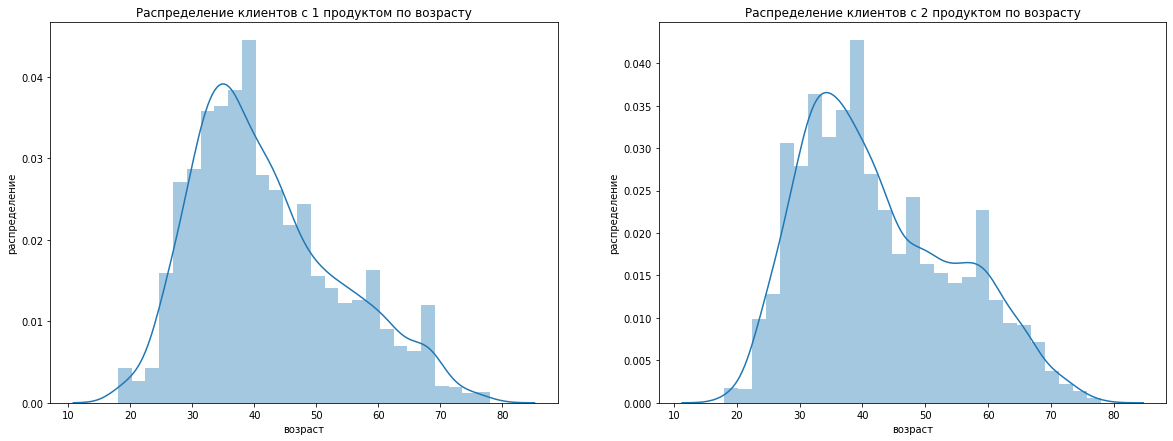

In [78]:
plt.figure(figsize=(20, 7))

ax1 = plt.subplot(1, 2, 1)
ax1 = sns.distplot(h_1_1, label = 'два продукта')
plt.ylabel('распределение')
plt.xlabel('возраст')
plt.title('Распределение клиентов с 1 продуктом по возрасту')

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.distplot(h_1_2, label = 'два продукта')
plt.ylabel('распределение')
plt.xlabel('возраст')
plt.title('Распределение клиентов с 2 продуктом по возрасту');

- распрделение выглядит колокообразным, однако нельзя назвать распределение нормальным
- датафрейм содержит выбросы
- посколько тест Стьдента требует нормального распеределения, перестрахуемся и проверим гипотезу тестом Манна-Уитни

In [79]:
alpha = 0.05

results = st.mannwhitneyu(h_1_1, h_1_2)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.055571437708820115
Не получилось отвергнуть нулевую гипотезу


Таким образом, нет основания считать, что различие возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, есть.

<a id='14'></a>
### ГИПОТЕЗА 2. Разница в доходах мужчин и женщин

- Н0 - Нулевая гипотеза - различий в дохадах между мужчинами и женщинами нет

- Н1 - Алтернативная гипотеза - различие в дохадах между мужчинами и женщинами есть

Зададим уровень статистической значимости alpha - 5% (0.05)

In [80]:
# объявим новые переменные, содержащие информацию о заработной плате мужчин и женщин
h_2_1 = df.query('gender == "М"')['est_salary']
h_2_2 = df.query('gender == "Ж"')['est_salary']

Прежде, чем выбрать метод проверки статистическиой гипотезы, посмотрим, можно ли считать распределние генеральных совокупностей нормальным

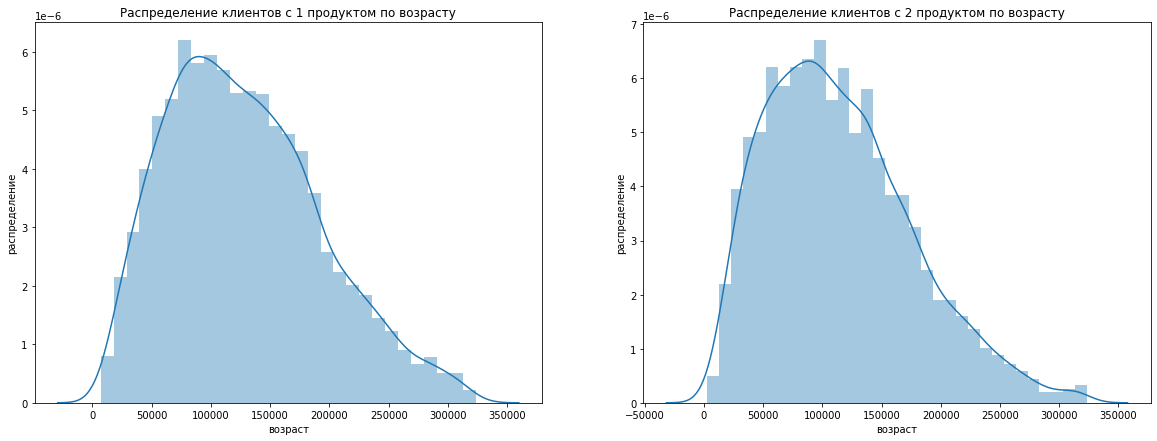

In [81]:
plt.figure(figsize=(20, 7))

ax1 = plt.subplot(1, 2, 1)
ax1 = sns.distplot(h_2_1, label = 'два продукта')
plt.ylabel('распределение')
plt.xlabel('возраст')
plt.title('Распределение клиентов с 1 продуктом по возрасту')

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.distplot(h_2_2, label = 'два продукта')
plt.ylabel('распределение')
plt.xlabel('возраст')
plt.title('Распределение клиентов с 2 продуктом по возрасту');

- распрделение выглядит колокообразным, однако из-за большого количесвта выбросов применение теста Стьюдента невозможно
- проверим гипотезу тестом Манна-Уитни

In [82]:
alpha = 0.05

results = st.mannwhitneyu(h_2_1, h_2_2 )

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  2.83937308292063e-24
Отвергаем нулевую гипотезу


Таким образом, есть основания считать, что различие между заработной платой мужчин и женщин есть. К сожалению, миф о неравенстве зарплат между мужчинами и женщинами - совсем не миф =(

<div style="border:solid black 3px; padding: 20px">

**Выводы по шагу 3**

В ход шага проверки статистических гипотез методом Манна-Уитни нами выполнено следующее:

**1. Различий в возрасте между клиентами, пользующихся 1 продуктом банка, и пользовтаелями, использующими 2мя продуктами, нет**

**2. Различие в дохадах между мужчинами и женщинами есть**

<a id='15'></a>
## ШАГ 4. Промежуточный итог об оттоке пользователей.

В ходе исследования нами были выявлены показатели различных метрик, характерные для высокоотточных и низкоотточны клиентов. Пришло время их свести воедино

**Показтели метрик высокотточных клиентов**
1. Кредитный скоринг -  830-920
2. Возраст - 26-34 года и 50-60 лет
3. Город - Ярославль
4. Пол - мужской
5. Оценка активов - 3-5
6. Баланс - от 500 тыс.руб
7. Количество продуктов банка - 2 и более
8. Кредитная карта - нет
9. Активность - да
10. Зарплата - более 100 тыс. руб.

**Показтели метрик низкоотточных клиентов**
1. Кредитный скоринг -  600-820 и 930-1000
2. Возраст - 35-50 и 61-78 лет
3. Город - Рыбинск
4. Пол - женский
5. Оценка активов - 0-2
6. Баланс - до 500 тыс.руб
7. Количество продуктов банка - 1
8. Кредитная карта - есть
9. Активность - нет
10. Зарплата - до 100 тыс. руб.

Таким образом, мы имеем определенные показатели метрик клиентов, имея которые клиент с большей или меньшей вероятность может утечь в неизвестность. При этом, чем большее количество метрик сходится в одном клиенте, тем больше (или ниже, смотря о каких показателях идет речь) вероятность оттока. 

<div style="border:solid black 3px; padding: 20px">

**Попробуем сформулировать рекомендации для клиентов, подходящих под описание высокоотточных:**

- Это мужчины среднего и выше сренего класса, в среднем, а так же пенсионном, возрасте, имеющие несколько активов (средний класс же!), проживающий в Ярославле и по каким то причинам не пользующиеся кредитными картами

Возможные рекомендации по работе с оттоком:
- льготные условия по автокредитам (мужчины любят тачки)
- льготные условия по пенсионным накоплениям/отчислениям (у нас же есть пенсионеры). Возможно, организация банковского негосударственного пенсионного фонда
- льготные условия по страхованию имущества (большие деньги - большие переживания по их сохранению)
- льготные условия по кредитным картам (а то че это они? каждый уважающий себя среднеклассный мужик должен иметь кредитку в кошельке)

**Ну и скажем пару слов о показателях метрик низкоотточных клиентов:**

- Это женщины среднего и пенсинного возраста с небольшими активами, накоплениями и заработной платой, пользующиеся кредитной картой

Мы не беремся анализировать причины успеха в работе с такими клиентами, но рекомендуем провести исследование на соответсвующую тему, возможно, это поможет понять, боли и чаяния высокоотточных клиентов.

<a id='16'></a>
## ШАГ 5. Сегментация по количеству потребляемых продуктов

Теперь попробуем сегментировать клиентов.
- Для базового сегментирования подайдет параметр имеющий 3-5 категорий
- нет необходимости вводить дополнительную категоризацию - датафрейм уже содержит подходящие колонки: город, оценка собственности, количество используемых продуктов
- выбирая основной параметр для категоризации возьмем параметр  "количесвто используемых продуктов банка" по 2м причинам:
    - сразу виднны хорошие и проблемные категории клиентов по. количеству потребляемых продуктов
    - оптимальное количесвтво первоначальных категорий
    - большой охват датасета
    - в задании предложено взять именно этот параметр для сегментации)))

In [83]:
# еще раз посмотрим распеределение пользователей
df_full.groupby('products')['userid'].count()

products
1    3306
2    5099
3    1028
4     474
5      19
Name: userid, dtype: int64

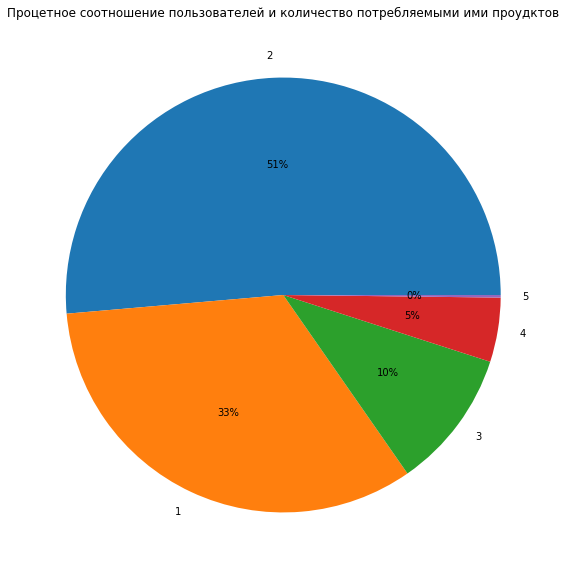

In [84]:
# визуализируем распределение
df_full.groupby('products')['userid'].count()\
            .sort_values(ascending = False)\
            .plot(kind = 'pie', figsize=(10,10), autopct='%1.0f%%');

plt.title('Процетное соотношение пользователей и количество потребляемыми ими проудктов');
plt.ylabel('');

Итак, мы имеем следующее:
1. Больше всего пользователей с 2 продуктами (5076 клиентов, 52% от датасета)
2. Второе место - пользователи с 1 продуктом (3303 клиентов, 33% от датасета)
3. 3 продукта (1027 пользователей, 10% от датасета)
4. 4 продукта (472 пользовтаеля, 5% от датасета)
5. 5 продутков (19 пользователей)

- Сегментировав пользовтаелей таким образом мы сталкиваемся с одной проблемой - слишком большими сегментами для пользовтаелей с 1 и 2 продуктами. 
- Поскольку нам известно, что отток среди мужчин значительно превышает отток среди женщин, а распределение полов в целом по датасету равномерно, дополнительно разделение сегментов по признаку пола для 1 и 2 группы кажется логичным решением: мы детализируем сегментацию по одному из ключевых для оттока парраметрам и уменьшаем размер сегментов, что так же скажется на детализации сегментов. 
- Пользователей с количеством продуктов 3-5 - отнесем в один сегмент
- Так же в начале исследования нам был найден еще 1 высокоотточный сегмент - богатеи. Проанализируем и его

In [85]:
# объявим сегменты
s_1 = df_full.query('balance > 2000000')
s_2 = df.query('products == 2 and male == 1')
s_3 = df.query('products == 2 and female == 1')
s_4 = df.query('products == 1 and male == 1')
s_5 = df.query('products == 1 and female == 1')
s_6 = df.query('products > 2')

<a id='17'></a>
### СЕГМЕНТ 1. Клиенты с текущим балансом более 2 млн.руб.

In [86]:
s_1.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,female,male,rostov,rybinsk,yaroslavl
count,428.000000,428.000000,427.000000,428.000000,4.280000e+02,428.000000,428.000000,428.000000,4.280000e+02,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,175125.390187,924.766355,45.070258,4.329439,4.469091e+06,2.455607,0.457944,0.528037,3.251910e+05,0.490654,0.359813,0.640187,0.081776,0.193925,0.724299
std,36153.737636,33.824199,11.049812,1.008801,7.317254e+06,0.881977,0.498811,0.499798,2.648784e+05,0.500498,0.480507,0.480507,0.274343,0.395834,0.447390
min,96562.000000,784.000000,23.000000,1.000000,2.009137e+06,1.000000,0.000000,0.000000,2.176500e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,147592.000000,903.000000,36.000000,4.000000,2.356610e+06,2.000000,0.000000,0.000000,1.689880e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,176316.000000,927.000000,42.000000,5.000000,2.919805e+06,2.000000,0.000000,1.000000,2.313290e+05,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,209170.000000,948.000000,54.000000,5.000000,4.134207e+06,3.000000,1.000000,1.000000,3.467985e+05,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,229058.000000,1000.000000,78.000000,8.000000,1.191136e+08,4.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Описание сегмента:
- пол - мужской (64%) и женский (36%)
- количество продуктов банка - 2
- количество - 428 клиента
- средний (здесь и далеее - медианный, как устойчивый к выбросам) возраст 42 года
- средний кредитный скоринг - 927
- средняя оценка активов - 5
- средний баланс - 2,9 млн.р.
- кредитная карта есть у 45%
- средняя з/п - 231 т.р.
- отток - 49%
- есть явный перекос на г.Ярославль

<a id='18'></a>
### СЕГМЕНТ 2. Мужины с 2 продуктами банка

Посмотрим как выглядит сегмент

In [87]:
s_2.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,female,male,rostov,rybinsk,yaroslavl
count,2236.000000,2236.000000,2236.000000,2236.000000,2.091000e+03,2236.0,2236.000000,2236.000000,2236.000000,2236.000000,2236.0,2236.0,2236.000000,2236.000000,2236.000000
mean,171694.128354,838.658766,40.028623,3.105546,6.060089e+05,2.0,0.714669,0.494633,119541.941860,0.245528,0.0,1.0,0.153846,0.295617,0.550537
std,33667.740189,56.649772,10.529136,1.729995,4.347139e+05,0.0,0.451673,0.500083,60030.637945,0.430496,0.0,0.0,0.360882,0.456422,0.497551
min,97131.000000,665.000000,18.000000,0.000000,0.000000e+00,2.0,0.000000,0.000000,8401.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000
25%,142169.750000,796.000000,32.000000,2.000000,2.737289e+05,2.0,0.000000,0.000000,74672.250000,0.000000,0.0,1.0,0.000000,0.000000,0.000000
50%,171997.500000,836.000000,38.000000,3.000000,4.798728e+05,2.0,1.000000,0.000000,111268.500000,0.000000,0.0,1.0,0.000000,0.000000,1.000000
75%,201334.500000,880.000000,47.000000,4.000000,8.652118e+05,2.0,1.000000,1.000000,158154.250000,0.000000,0.0,1.0,0.000000,1.000000,1.000000
max,229015.000000,998.000000,74.000000,9.000000,1.999799e+06,2.0,1.000000,1.000000,311464.000000,1.000000,0.0,1.0,1.000000,1.000000,1.000000


Описание сегмента:
- пол - мужской
- количество продуктов банка - 2
- количество - 2236 клиента
- средний возраст 38 лет
- средний кредитный скоринг - 834
- средняя оценка активов - 3
- средний баланс - 479 т.р.
- кредитная карта есть у 71%
- средняя з/п - 111 т.р.
- отток - 25%
- нет ярких всплесков распределения по городам относительно всего датасета

<a id='19'></a>
### СЕГМЕНТ 3. Женщины с 2 продуктами банка

In [88]:
s_3.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,female,male,rostov,rybinsk,yaroslavl
count,2530.000000,2530.00000,2530.000000,2530.000000,2.411000e+03,2530.0,2530.000000,2530.000000,2530.000000,2530.000000,2530.0,2530.0,2530.000000,2530.000000,2530.000000
mean,171133.847431,842.28419,44.899605,3.145455,5.976892e+05,2.0,0.565613,0.534783,106429.721344,0.124901,1.0,0.0,0.171937,0.317787,0.510277
std,33776.739673,53.88783,12.985719,1.677482,4.029834e+05,0.0,0.495774,0.498887,57264.223196,0.330672,0.0,0.0,0.377400,0.465708,0.499993
min,94561.000000,657.00000,19.000000,0.000000,2.600000e+01,2.0,0.000000,0.000000,5341.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000
25%,141088.250000,801.00000,34.000000,2.000000,2.955617e+05,2.0,0.000000,0.000000,60787.250000,0.000000,1.0,0.0,0.000000,0.000000,0.000000
50%,172503.000000,843.00000,43.000000,3.000000,4.856198e+05,2.0,1.000000,1.000000,99169.500000,0.000000,1.0,0.0,0.000000,0.000000,1.000000
75%,200944.750000,880.00000,56.000000,4.000000,8.341133e+05,2.0,1.000000,1.000000,142004.750000,0.000000,1.0,0.0,0.000000,1.000000,1.000000
max,229136.000000,997.00000,78.000000,9.000000,1.993731e+06,2.0,1.000000,1.000000,320447.000000,1.000000,1.0,0.0,1.000000,1.000000,1.000000


Описание сегмента:
- пол - женский
- количество продуктов банка - 2
- количество - 2530 клиента
- средний возраст - 43 года
- средний кредитный скоринг - 843
- средняя оценка активов - 3
- средний баланс - 485 т.р.
- кредитная карта есть у 56%
- средняя з/п - 99 т.р.
- отток - 12%
- нет ярких всплесков распределения по городам относительно всего датасета

<a id='20'></a>
### СЕГМЕНТ 4. Мужчины с 1 продуктом банка

In [89]:
s_4.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,female,male,rostov,rybinsk,yaroslavl
count,1597.000000,1597.000000,1597.000000,1597.000000,6.910000e+02,1597.0,1597.000000,1597.000000,1597.000000,1597.000000,1597.0,1597.0,1597.000000,1597.000000,1597.000000
mean,172644.378209,855.725736,39.582342,1.364433,5.113848e+05,1.0,0.872260,0.522855,146239.418910,0.102066,0.0,1.0,0.146525,0.252974,0.600501
std,33344.631488,75.005739,10.469924,1.844843,3.941617e+05,0.0,0.333904,0.499634,68280.398475,0.302830,0.0,0.0,0.353742,0.434853,0.489949
min,97604.000000,654.000000,18.000000,0.000000,2.100000e+01,1.0,0.000000,0.000000,7054.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000
25%,144091.000000,805.000000,32.000000,0.000000,2.066186e+05,1.0,1.000000,0.000000,93709.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000
50%,173774.000000,884.000000,38.000000,0.000000,3.955624e+05,1.0,1.000000,1.000000,141750.000000,0.000000,0.0,1.0,0.000000,0.000000,1.000000
75%,202047.000000,911.000000,46.000000,3.000000,7.293870e+05,1.0,1.000000,1.000000,191486.000000,0.000000,0.0,1.0,0.000000,1.000000,1.000000
max,229054.000000,990.000000,72.000000,8.000000,1.941438e+06,1.0,1.000000,1.000000,323502.000000,1.000000,0.0,1.0,1.000000,1.000000,1.000000


Описание сегмента:
- пол - мужской
- количество продуктов банка - 1
- количество - 1597 клиента
- средний возраст - 38 лет
- средний кредитный скоринг - 884
- средняя оценка активов - 0
- средний баланс - 395 т.р.
- кредитная карта есть у 87%
- средняя з/п - 141 т.р.
- отток - 10%
- нет вспелесков на города

<a id='21'></a>
### СЕГМЕНТ 5. Женщины с 1 продуктом банка

In [90]:
s_5.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,female,male,rostov,rybinsk,yaroslavl
count,1379.000000,1379.000000,1379.000000,1379.000000,6.450000e+02,1379.0,1379.000000,1379.000000,1379.000000,1379.000000,1379.0,1379.0,1379.000000,1379.000000,1379.000000
mean,171854.683829,853.811458,44.719362,1.463379,4.871765e+05,1.0,0.850616,0.519217,132290.050036,0.042059,1.0,0.0,0.142857,0.261784,0.595359
std,33429.220021,73.079469,12.699165,1.939001,3.383453e+05,0.0,0.356596,0.499812,67365.592821,0.200798,0.0,0.0,0.350054,0.439765,0.491001
min,94590.000000,655.000000,18.000000,0.000000,6.000000e+00,1.0,0.000000,0.000000,2546.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000
25%,142925.000000,802.500000,35.000000,0.000000,2.459844e+05,1.0,1.000000,0.000000,79442.500000,0.000000,1.0,0.0,0.000000,0.000000,0.000000
50%,172768.000000,879.000000,42.000000,0.000000,4.071045e+05,1.0,1.000000,1.000000,125157.000000,0.000000,1.0,0.0,0.000000,0.000000,1.000000
75%,201199.000000,910.000000,54.000000,3.000000,6.509001e+05,1.0,1.000000,1.000000,177384.000000,0.000000,1.0,0.0,0.000000,1.000000,1.000000
max,229145.000000,999.000000,78.000000,9.000000,1.716115e+06,1.0,1.000000,1.000000,323366.000000,1.000000,1.0,0.0,1.000000,1.000000,1.000000


Описание сегмента:
- пол - женский
- количество продуктов банка - 1
- количество - 1379 клиента
- средний возраст - 42 года
- средний кредитный скоринг - 879
- средняя оценка активов - 0
- средний баланс - 407 т.р.
- кредитная карта есть у 85%
- средняя з/п - 9125 т.р.
- отток - 4%
- нет всплеска на города

<a id='22'></a>
### СЕГМЕНТ 6. Клиенты с 3-5 продуктами банка

In [91]:
s_6.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,female,male,rostov,rybinsk,yaroslavl
count,1342.000000,1342.000000,1342.000000,1342.000000,1.320000e+03,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000
mean,171363.137109,841.513413,43.488823,3.653502,7.568555e+05,3.320417,0.464978,0.538003,110171.763785,0.368852,0.526080,0.473920,0.116244,0.178838,0.704918
std,33846.995176,52.082946,12.603556,1.565826,4.809989e+05,0.496235,0.498958,0.498740,60859.148628,0.482674,0.499505,0.499505,0.320637,0.383359,0.456250
min,95384.000000,689.000000,19.000000,0.000000,6.300000e+01,3.000000,0.000000,0.000000,3487.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142927.000000,802.000000,34.000000,3.000000,3.594845e+05,3.000000,0.000000,0.000000,63597.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,172991.500000,839.000000,40.000000,4.000000,6.205884e+05,3.000000,0.000000,1.000000,101372.500000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,200037.250000,878.000000,53.000000,5.000000,1.173679e+06,4.000000,1.000000,1.000000,148802.750000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,229009.000000,996.000000,78.000000,9.000000,1.980526e+06,5.000000,1.000000,1.000000,319714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Описание сегмента:
- пол - мужской и женский (52/48)
- количество продуктов банка - 3 и более
- количество - 1342 клиента
- средний возраст - 40 год
- средний кредитный скоринг - 839
- средняя оценка активов - 4
- средний баланс - 620 т.р.
- кредитная карта есть у 46%
- средняя з/п - 101 т.р.
- отток - 36%
- есть всплеск на проживание в г.Ярославль

###### **Ранжируем сегменты по оттоку:**
    
**1. Сегмент 1 (отток 49%).** Отличительные черты - мужчины и женщины, высокая оценка активов, очень большой баланс, не так много банковских продуктов, мало пользовтаелей кредитной картой. Это состоятельные клиенты, хранязие деньги в нашем банке. Может быть, они не чувствуют себя ВИП клиентами? Стоит попробовать "облизать" со всех сторон, предложить вип продукты.

**2. Сегмент 6 (отток 36%).** Отличительные черты -  оценка активов, так же большой баланс, много банковских продуктов, мало пользовтаелей кредитной картой, в большей степени из большого города Ярославль. чуть менее состоятельные клиенты. Они так же не удовлетворены банковскими продуктами

**3. Сегмент 2 (отток 25%).** Отличительные черты - мужчины, среднего и пенсионного возраста, активные пользователи кредитной карты, средние сбережения и з/п. Что-то явно не так с нашими мужчинами среднего класса. Может попробовать выдать льготный автокредит? Профинансировать их стартап по открытию пивного бара? Подарить удочку?

**4. Сегмент 3 (отток 12%).** Отличительные черты - женщины, "бальзаковского" возраста, среднячковые пользователи кредитной карты, средние сбережения и з/п. Сложно дать рекомендации по этому сегменту: отток не велик, мы все делаем с ними правильно. Понять бы еще, что именно мы с ними делаем?

**5. Сегмент 4 (отток 10%).** Отличительные черты - мужчины, активные пользователи кредитной карты, но с небольшими сбережениями. Странно, что пользователи не хранят деньги в нашем банке, но активно пользуются кредитной картой. Возможно стоит пересмотреть условия для расчетных и сберигательных счетов для активных пользователей кредитной картой? Это может пригодиться в работе с другими клиентами

**6. Сегмент 5 (отток 4%).** Отличительные черты - женщины, без сбережений и низкой оценкой активов, активные пользовтаели кредитных карт. Опять видим ситуацию, что клиенты деньги не хранят, но кредиткой пользуются активно. Рекомендации те же, что и для сегмента 3.

- Таким образом, мы наблюдаем явный отток состоятельных клиентов, хранящих деньги в лучшем банке на свете "Метанпромбанк", не пользующиеся кредитными картами, с одной стороны, и явную приверженность клиентов с низким доходом, небольшими сбережениями (в нашем банке, может они хранят деньги в "Омегабанк"?) и активными пользовтаелями кредитных карт


- Клиентам нравится наши кредитнокарточные продукты и не очень довольны условиями своих сбережений. Стоит попробовать пересмотреть условия для вкладов, а так же активные продажи продукта "кредитные карты"

<div style="border:solid black 3px; padding: 20px">

**Выводы по шагу 5**

В ход шага сегментации клиентов выполнено следующее:
    
**1. Выполнена сегментация по количеству потребляемых банковских продуктов и полу клиентов**
   - **Сегмент 1 (отток 49%).** Отличительные черты - сверхбогатые мужчины и женщины, 2 банковских продукта, среднего и пенсионного возраста, не являются пользователями кредитных карт, сверхвысокие сбережения и з/п.
   - **Сегмент 2 (отток 26%).** Отличительные черты - 2 банковских продукта, мужчины , среднего и пенсионного возраста, активные пользователи кредитной карты, средние сбережения и з/п.
   - **Сегмент 3 (отток 13%).** Отличительные черты - 2 банковских продукта, женщины, чуть выше среднего возраста, среднячковые пользователи кредитной карты, средние сбережения и з/п. 
   - **Сегмент 4(отток 10%).** Отличительные черты - 1 продукт банка, мужчины, активные пользователи кредитной карты, но с небольшими сбережениями. 
   - **Сегмент 5 (отток 4%).** Отличительные черты - 1 продукт банка, женщины, без сбережений и низкой оценкой активов, активные пользовтаели кредитных карт. 
   - **Сегмент 6 (отток 36%).** Отличительные черты - 3 и более продуктов банка, мужчины и женщины, высокая оценка активов, большой баланс, много банковских продуктов, мало пользовтаелей кредитной картой, в большей степени из большого города Ярославль. 

**2. Наблюдения и предложения**
   - Мы наблюдаем явный отток состоятельных клиентов, хранящих деньги в лучшем банке на свете "Метанпромбанк", не пользующиеся кредитными картами, с одной стороны, и явную приверженность клиентов с низким доходом, небольшими сбережениями (в нашем банке, может они хранят деньги в "Омегабанк"?) и активными пользовтаелями кредитных карт
   - Клиентам нравится наши кредитнокарточные продукты и не очень довольны условиями своих сбережений. Стоит попробовать пересмотреть условия для вкладов, а так же активные продажи продукта "кредитные карты"

<a id='23'></a>
## Выводы и рекомендации

<div style="border:solid black 3px; padding: 20px">

В ходе исследования были выполнены следующие шаги

**1. Загрузка данных и подготовка к исследования**
- нами загружен датасет о клиентах банка, содержащий 10000 строк
- удалены строки с пропусками в столбце `age`
- пропуски в столбце `balance` заменены на нулевые показатели для дальнего анализа
- удалены строки с выбросами по колонке `balance`
- удалены неявные дубликаты по столбцу `userid`
- часть столбцов (`score`, `age`, `balance` и `est_salary`) приведены к целочисленному значению
- часть столбцов (`gender` и `city`) приведены к бинарному значению методом get_dummies
- название столбцов приведены к "змеиному" регистру
- в ходе предобработки данных было удалено около 10% от всего датасета


**2. Описаны типичные клиенты по столбцам**
   - после предобработки датасет содержит **9084 уникальных клиентов**
   - мужчины и женщины разделены по ровну (49/51)
   - 58% из Ярославля, 27% из Рыбинска, 15% из Ростова
   - средняя оценка кредитного скоринга - **848 балла**
   - средний возраст - **40 лет**
   - средняя оценка собственности - **3**
   - медианный баланс - **487 тыс.руб.**, средний баланс - **611 тыс.руб.**
   - среднее количество используемыех продуктов - **2**
   - медианная з/п - **113 тыс.руб.**, средний баланс - **121 тыс.руб.**
   - отточные клиенты в среднем (без сегментации) состовляют **17,4%**
   - аж **68%** клиентов банка имеют кредитную карту
    
    
**3. Найдены отличия в распределениях оставшихся и отточных клиентов по каждому столбцу:**
   - наблюдается явная проблема с оттоком клиентов с кредитной оценкой **830-900**
   - возрас оттока - **26-34 года и 50-60 лет**, возраст оставшихся клиентов **35-50 и 61-78 лет**
   - хуже всего с оттоком обстоят дела в **Ярославле** (как в процентном, так и в абсолютном значениях)
   - отток **мужчин** значительно превышает отток женщин
   - большая часть клиентов имеет **оценку активов 1-2**, наблюдается значительный отток клиентов с оценкой активов **3 и более**
   - больше всего клиентов с нулевым (а точнее неизвестным) балансом. отток среди них минимальный, с ростом баланса клиента отток так же растет (начиная примерно от **500 тыс.руб.**)
   - больше всего клиентов с **1-2 продуктами**. наблюдается экспонентный рост процента отточных клиентов для клиентов с **2 и более количеством продуктов банка**
   - примерно у **70**% клиентов есть кредитная карта, при этом процентный отток выше у клиентов без кредитной карты
   - активные и неактивные пользователи разделены приблизительно в равных долях. отток у активных пользовтаелей выше
   - больше всего клиентов с **з/п 0-200т.р.**, больший отток у сегмента з/п **100-200 тыс. руб.**


**4. Построен хитмэп по матрице общей корреляции**
   - признаков, оказываающих сильное влияние на отток **не выявлено**
   - небольшая положительная корреляция с оттоком выявлена у **количества продуктов банка (30%)**, **количетсвом собственности клиента (27%)**, **балансом на счете (27%)**, **активностью клиента (17%)**, **мужским полом (14%)** и **скоринговым рейтингом (10%)**
   - небольшая отрицательная корреляция с оттоком выявлена у **женского пола (14%)**, с **наличием кредитной карты (13%)**
   

**5. Проверены статистические гипотезы**
   - Различий в возрасте между клиентами, пользующихся 1 продуктом банка, и пользовтаелями, использующими 2мя продуктами, нет
   - Между доходами мужчин и женщин есть статистически значимая разница
   
**6. Сформулированы рекомендации для работы с клиентами, подходящих под описание высокоотточных:**
- льготные условия по автокредитам (мужчины любят тачки)
- льготные условия по пенсионным накоплениям/отчислениям (у нас же есть пенсионеры). Возможно, организация банковского негосударственного пенсионного фонда
- льготные условия по страхованию имущества (большие деньги - большие переживания по их сохранению)
- льготные условия по кредитным картам (а то че это они? каждый уважающий себя среднеклассный мужик должен иметь кредитку в кошельке)

**7. Выполнена сегментация по количеству потребляемых банковских продуктов и полу клиентов и их ранжирование по оттоку**
     
   - **Сегмент 1 (отток 49%).** Отличительные черты - сверхбогатые мужчины и женщины, 2 банковских продукта, среднего и пенсионного возраста, не являются пользователями кредитных карт, сверхвысокие сбережения и з/п.
   - **Сегмент 6 (отток 36%).** Отличительные черты - 3 и более продуктов банка, мужчины и женщины, высокая оценка активов, большой баланс, много банковских продуктов, мало пользовтаелей кредитной картой, в большей степени из большого города Ярославль.     
   - **Сегмент 2 (отток 25%).** Отличительные черты - 2 банковских продукта, мужчины , среднего и пенсионного возраста, активные пользователи кредитной карты, средние сбережения и з/п.
   - **Сегмент 3 (отток 12%).** Отличительные черты - 2 банковских продукта, женщины, чуть выше среднего возраста, среднячковые пользователи кредитной карты, средние сбережения и з/п. 
   - **Сегмент 4 (отток 10%).** Отличительные черты - 1 продукт банка, мужчины, активные пользователи кредитной карты, но с небольшими сбережениями. 
   - **Сегмент 5 (отток 4%).** Отличительные черты - 1 продукт банка, женщины, без сбережений и низкой оценкой активов, активные пользовтаели кредитных карт. 


**8. Описаны наблюдения и предложения**
   - Мы наблюдаем явный отток состоятельных клиентов, хранящих деньги в лучшем банке на свете "Метанпромбанк", не пользующиеся кредитными картами, с одной стороны, и явную приверженность клиентов с низким доходом, небольшими сбережениями (в нашем банке, может они хранят деньги в "Омегабанк"?) и активными пользовтаелями кредитных карт
   - Клиентам нравится наши кредитнокарточные продукты и не очень довольны условиями своих сбережений. Стоит попробовать пересмотреть условия для вкладов, а так же активные продажи продукта "кредитные карты"
    - **Сегмент 1 (отток 49%).** Предложить льготные условия для вкладов в формате VIP, предложить VIP льготы для кредитных карт
    - **Сегмент 6 (отток 36%).** Предложить целеые программы по улучшению условий для сбережения. Активное предложение кредитных карт
    - **Сегмент 2 (отток 25%).** Предложить пенсионные программы, предложить целевые автокредиты и кредиты на открытие своего дела
    - **Сегмент 3 (отток 12%).** Предложить улучшенные условия по оформлению кредитных карт, кэш-бэк программ
    - **Сегмент 4 (отток 10%).** Предложить улучшенные условия для открытия влкадов для держателей кредитных карт
    - **Сегмент 5 (отток 4%).** Предложить улучшенные условия для открытия влкадов для держателей кредитных карт

<a id='24'></a>
## Презентация

<div style="border:solid black 3px; padding: 20px">
    
https://disk.yandex.ru/i/hFEEbLUxB-46JA 